<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2021/2022

Fakultas Ilmu Komputer, Universitas Indonesia

## **Proyek Akhir : Injury Surveillance**
### *gogo kasdd*
### Anggota Kelompok :
### - Raniah Nur Hanami - 1906293291
### - Marcia Nadin P - 1906293146
### - Anisa Hasna Nabila - 1806146865
### - Levina Herisha Rahma - 1806191263

</center>

In [1]:
references = [
              'https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column',
              'https://www.who.int/violence_injury_prevention/media/en/136.pdf',
              'https://www.cibmtr.org/DataManagement/TrainingReference/Manuals/DataManagement/Documents/appendix-i.pdf',
              'https://www.newgenapps.com/blogs/random-forest-analysis-in-ml-and-when-to-use-it-2/'
              ]

# Import library dan dataset

In [2]:
!pip install kmodes

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
import re
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from kmodes.kmodes import KModes

In [4]:
!git clone 'https://github.com/ranianhanami/tk-kasdd.git'

Cloning into 'tk-kasdd'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 10 (delta 1), reused 0 (delta 0), pack-reused 5
Unpacking objects: 100% (10/10), done.


In [5]:
dataset = pd.read_excel('/content/tk-kasdd/neis2020-modified.xlsx')

In [6]:
dataset.head(10)

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Hispanic,Body_Part,Diagnosis,Other_Diagnosis,Body_Part_2,Diagnosis_2,Other_Diagnosis_2,Disposition,Location,Fire_Involvement,Product_1,Product_2,Product_3,Alcohol,Drug,Stratum,PSU,Weight,Self_Inflicted
0,200104302,2020-01-01,71,1,1.0,NaN,2,75,62,NaN,NaN,NaN,NaN,1.0,1.0,0,1893.0,1820,0,0,0,S,46,73.8005,NO
1,200104307,2020-01-01,208,1,0.0,NaN,0,76,53,NaN,NaN,NaN,NaN,1.0,1.0,0,4010.0,1807,0,0,0,S,46,73.8005,NO
2,200104308,2020-01-01,70,2,1.0,NaN,2,35,71,PAIN,NaN,NaN,NaN,1.0,1.0,0,1842.0,0,0,0,0,S,46,73.8005,NO
3,200104309,2020-01-01,24,1,1.0,NaN,2,93,53,NaN,NaN,NaN,NaN,1.0,1.0,0,131.0,0,0,0,0,S,46,73.8005,NO
4,200104310,2020-01-01,28,2,1.0,NaN,2,31,71,PAIN,NaN,NaN,NaN,1.0,1.0,0,3277.0,0,0,0,0,S,46,73.8005,NO
5,200104640,2020-01-01,8,1,1.0,NaN,2,33,57,NaN,NaN,NaN,NaN,1.0,1.0,0,661.0,1807,0,0,0,C,31,4.8510,NO
6,200104642,2020-01-01,7,2,2.0,NaN,2,75,59,NaN,NaN,NaN,NaN,1.0,0.0,0,1893.0,0,0,0,0,C,31,4.8510,NO
7,200104645,2020-01-01,2,1,1.0,NaN,2,75,62,NaN,NaN,NaN,NaN,1.0,1.0,0,4076.0,1807,0,0,0,C,31,4.8510,NO
8,200104646,2020-01-01,7,1,1.0,NaN,2,33,57,NaN,NaN,NaN,NaN,1.0,9.0,0,1233.0,0,0,0,0,C,31,4.8510,NO
9,200104650,2020-01-01,18,2,1.0,NaN,2,75,71,HEADACHE,NaN,NaN,NaN,1.0,1.0,0,649.0,0,0,0,0,C,31,4.8510,NO


# Eksplorasi Dataset

## Jumlah kasus dari bulan ke bulan. Dapatkan Anda menemukan kasus terendah dan kasus tertinggi pada tahun 2020? Karakteristik cedera (atau penderita) apa yang umumnya terjadi pada bulan dengan kasus terendah dan kasus tertinggi?

In [ ]:
month = dataset['Treatment_Date'].dt.month
month.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Treatment_Date, dtype: int64

In [ ]:
month_df = month.value_counts().rename_axis('month').reset_index(name='counts')
month_df.head(13)

,month,counts
0,1,29936
1,2,28336
2,8,27996
3,10,27942
4,9,27671
5,7,27321
6,6,26098
7,11,25250
8,5,24288
9,3,23559


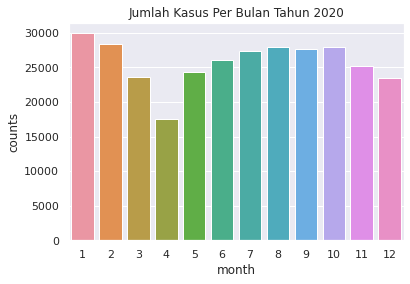

In [ ]:
ax = sns.barplot(x = 'month', y = 'counts', data = month_df)
ax.set_title('Jumlah Kasus Per Bulan Tahun 2020')
 
# Show the plot
plt.show()

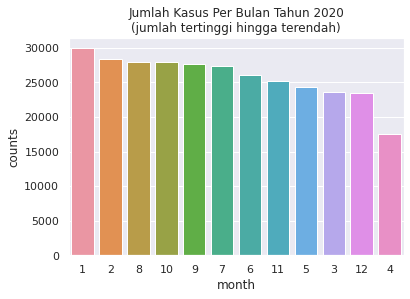

In [ ]:
ax2 = sns.barplot(x = 'month', y = 'counts', data = month_df, order=month_df['month'])
ax2.set_title('Jumlah Kasus Per Bulan Tahun 2020\n(jumlah tertinggi hingga terendah)')
 
# Show the plot
plt.show()

Dari hasil visualisasi di atas, dapat dilihat bahwa jumlah kasus tertinggi pada tahun 2020 terjadi pada bulan 1 atau Januari. Sedangkan, jumlah kasus terendah pada tahun 2020 terjadi pada bulan 4 atau April.

#### Karakteristik cedera

In [ ]:
dataset_month = dataset.drop('Treatment_Date', 1)
dataset_month['month'] = month
dataset_month.head(10)

,CPSC_Case_Number,Age,Sex,Race,Other_Race,Hispanic,Body_Part,Diagnosis,Other_Diagnosis,Body_Part_2,Diagnosis_2,Other_Diagnosis_2,Disposition,Location,Fire_Involvement,Product_1,Product_2,Product_3,Alcohol,Drug,Stratum,PSU,Weight,Self_Inflicted,month
0,200104302,71,1,1.0,NaN,2,75,62,NaN,NaN,NaN,NaN,1.0,1.0,0,1893.0,1820,0,0,0,S,46,73.8005,NO,1
1,200104307,208,1,0.0,NaN,0,76,53,NaN,NaN,NaN,NaN,1.0,1.0,0,4010.0,1807,0,0,0,S,46,73.8005,NO,1
2,200104308,70,2,1.0,NaN,2,35,71,PAIN,NaN,NaN,NaN,1.0,1.0,0,1842.0,0,0,0,0,S,46,73.8005,NO,1
3,200104309,24,1,1.0,NaN,2,93,53,NaN,NaN,NaN,NaN,1.0,1.0,0,131.0,0,0,0,0,S,46,73.8005,NO,1
4,200104310,28,2,1.0,NaN,2,31,71,PAIN,NaN,NaN,NaN,1.0,1.0,0,3277.0,0,0,0,0,S,46,73.8005,NO,1
5,200104640,8,1,1.0,NaN,2,33,57,NaN,NaN,NaN,NaN,1.0,1.0,0,661.0,1807,0,0,0,C,31,4.8510,NO,1
6,200104642,7,2,2.0,NaN,2,75,59,NaN,NaN,NaN,NaN,1.0,0.0,0,1893.0,0,0,0,0,C,31,4.8510,NO,1
7,200104645,2,1,1.0,NaN,2,75,62,NaN,NaN,NaN,NaN,1.0,1.0,0,4076.0,1807,0,0,0,C,31,4.8510,NO,1
8,200104646,7,1,1.0,NaN,2,33,57,NaN,NaN,NaN,NaN,1.0,9.0,0,1233.0,0,0,0,0,C,31,4.8510,NO,1
9,200104650,18,2,1.0,NaN,2,75,71,HEADACHE,NaN,NaN,NaN,1.0,1.0,0,649.0,0,0,0,0,C,31,4.8510,NO,1


In [ ]:
month_1 = dataset_month.loc[dataset_month['month'] == 1]
month_4 = dataset_month.loc[dataset_month['month'] == 4]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


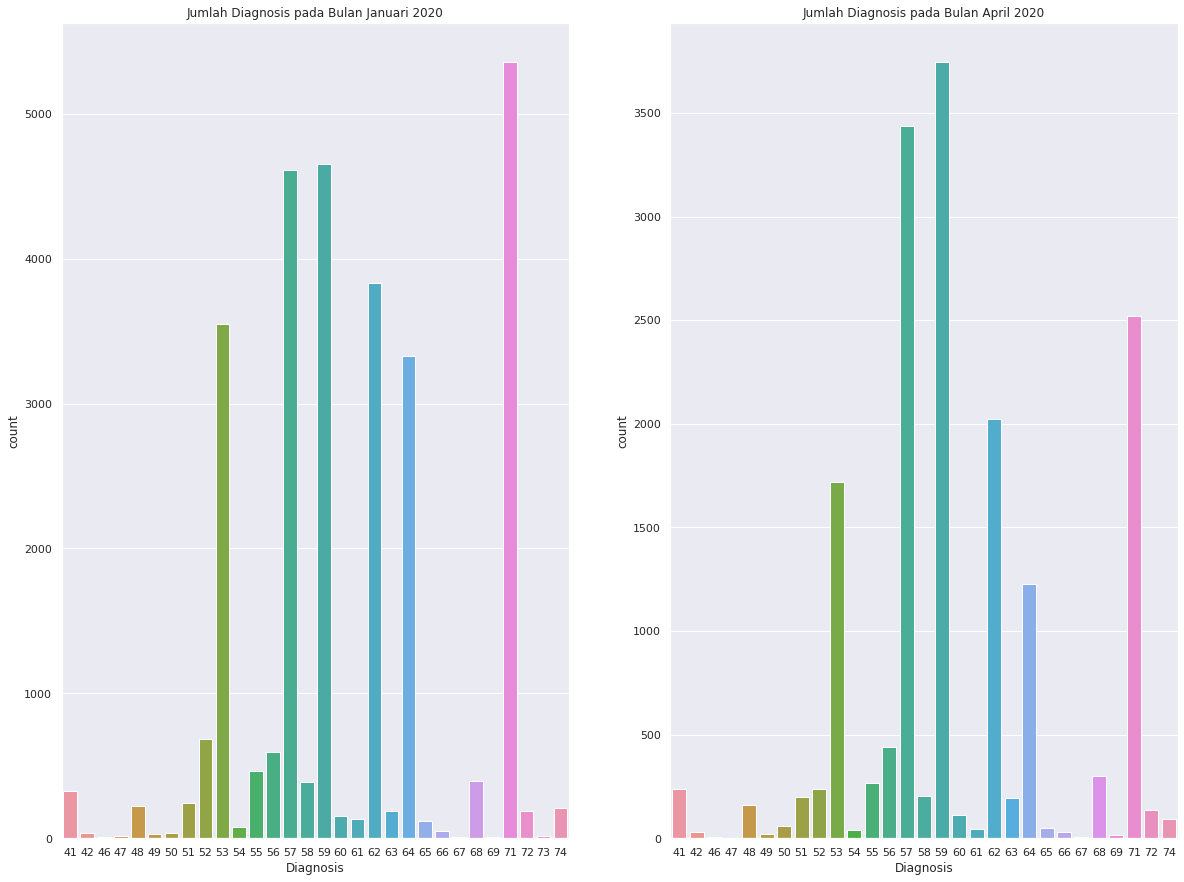

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,15))

cp = sns.countplot(month_1['Diagnosis'], ax=ax[0])
cp.set_title('Jumlah Diagnosis pada Bulan Januari 2020')
cp2 = sns.countplot(month_4['Diagnosis'], ax=ax[1])
cp2.set_title('Jumlah Diagnosis pada Bulan April 2020')

# Show the plot
plt.show()

In [ ]:
top_month_71 = month_1.loc[(month_1['Diagnosis'] == 71)]
top_month_71['Other_Diagnosis'].value_counts()

PAIN                     2466
INJURY                    249
NS                        226
NO INJURY                 111
CELLULITIS                 97
                         ... 
SKIN LESION                 1
SEVERE SEPSIS               1
EXERTIONAL CHEST PAIN       1
PRESEPTAL CELLULITIS        1
TRAUMA OF CHEST             1
Name: Other_Diagnosis, Length: 711, dtype: int64

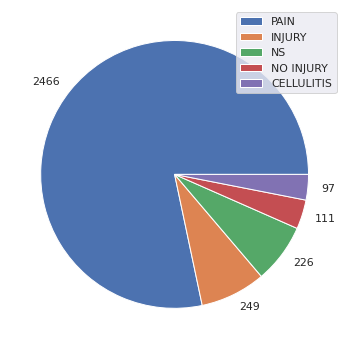

In [ ]:
plt.figure(figsize=(6,10))
plt.pie(top_month_71['Other_Diagnosis'].value_counts().nlargest(5), labels=top_month_71['Other_Diagnosis'].value_counts().nlargest(5))
plt.legend(top_month_71['Other_Diagnosis'].value_counts().nlargest(5).index)
plt.show()

In [ ]:
top_month_1 = month_1.loc[(month_1['Other_Diagnosis'] == 'PAIN')]

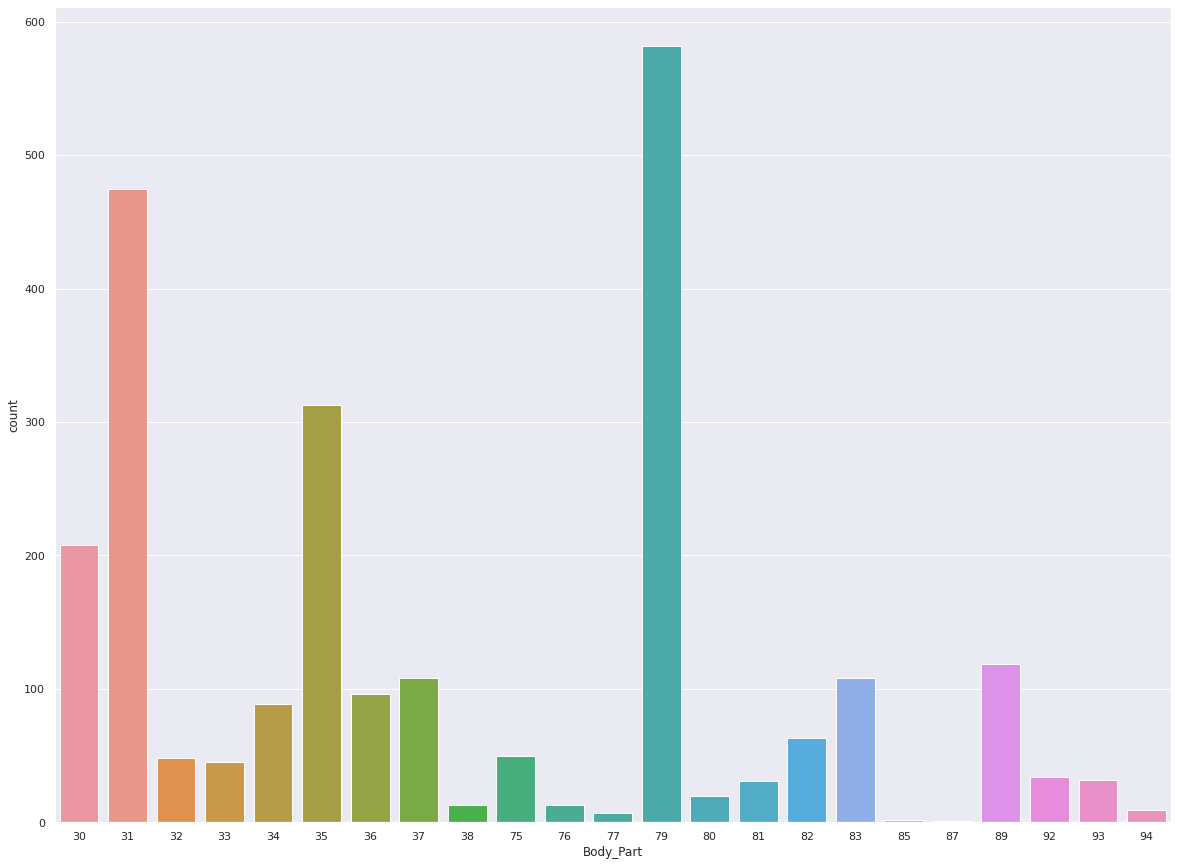

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,15))

cp = sns.countplot(x='Body_Part', data=top_month_1)

In [ ]:
top_month_4 = month_4.loc[(month_4['Diagnosis'] == 59)]

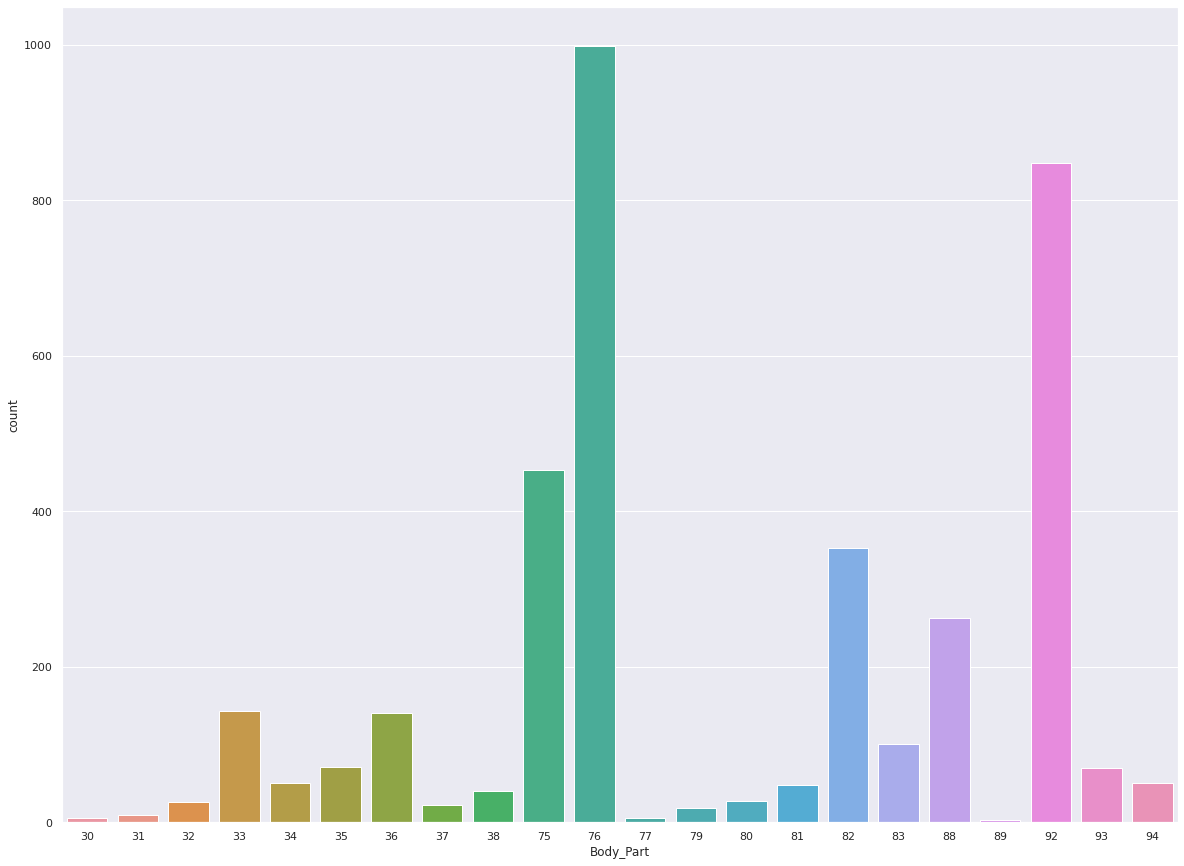

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,15))

cp = sns.countplot(x='Body_Part', data=top_month_4)

#### Karakteristik penderita

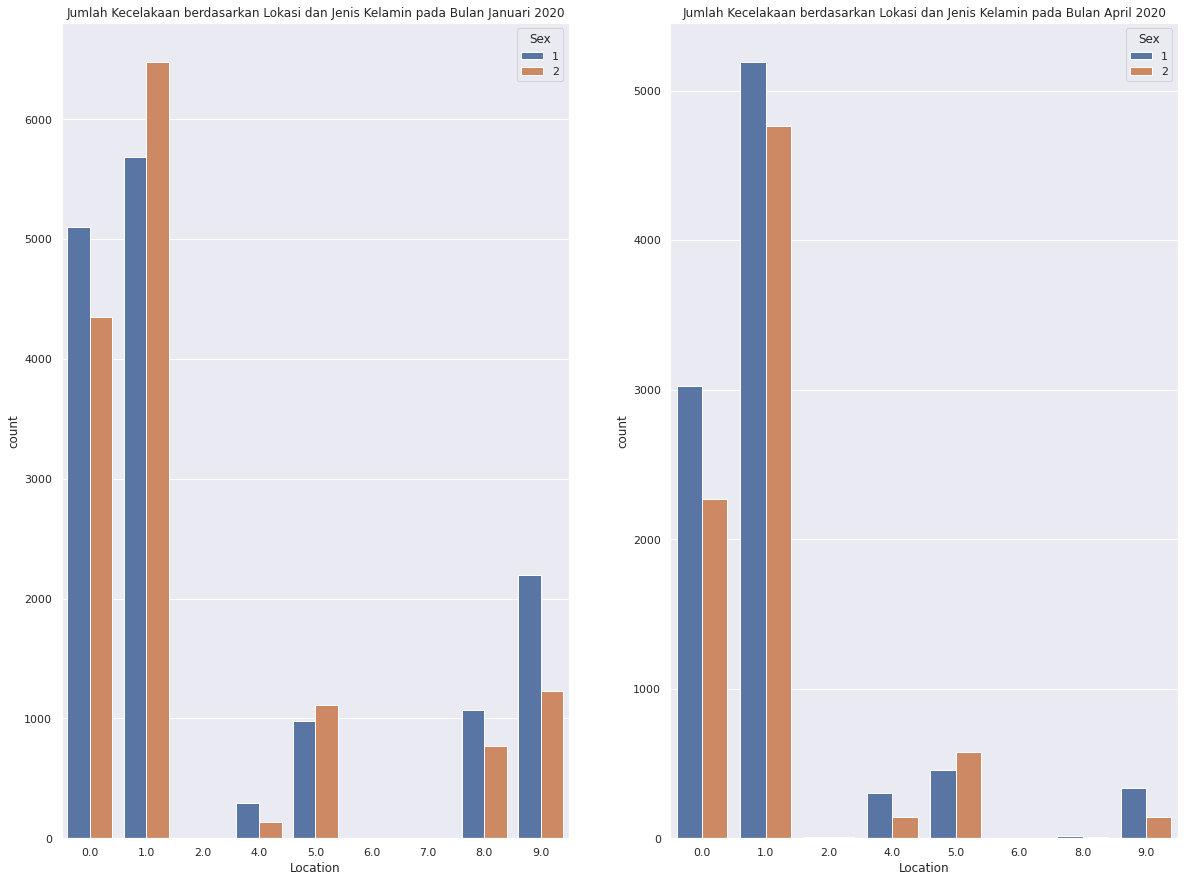

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,15))

cp = sns.countplot(x='Location', hue='Sex', data=month_1, ax=ax[0])
cp.set_title('Jumlah Kecelakaan berdasarkan Lokasi dan Jenis Kelamin pada Bulan Januari 2020')
cp2 = sns.countplot(x='Location', hue='Sex', data=month_4, ax=ax[1])
cp2.set_title('Jumlah Kecelakaan berdasarkan Lokasi dan Jenis Kelamin pada Bulan April 2020')

# Show the plot
plt.show()

> - Secara keseluruhan, kecelakaan paling sering terjadi di Home (label 1).
- Pada bulan Januari 2020, kecelakaan yang terjadi di Home lebih banyak dialami oleh wanita (label 2).
- Pada bulan April 2020, kecelakaan yang terjadi di Home lebih banyak dialami oleh pria (label 1).

## Karakteristik dari cedera (atau penderitanya) yang disebabkan masing-masing 5 produk dengan frekuensi tertinggi.

In [ ]:
dataset['Product_1'].value_counts().nlargest(5)

1807.0    28510
1842.0    24097
4076.0    19742
5040.0    12319
4074.0     7785
Name: Product_1, dtype: int64

In [ ]:
dataset['Product_2'].value_counts().nlargest(5)

0       251828
1807     15617
4057      2305
1884      1938
676       1826
Name: Product_2, dtype: int64

In [ ]:
dataset['Product_3'].value_counts().nlargest(5)

0       301988
1807      1969
676        638
4057       257
1884       242
Name: Product_3, dtype: int64

Kolom Produk_1 sudah mewakili kode produk yang memiliki frekuensi paling tinggi sehingga yang digunakan hanya Produk_1 saja.

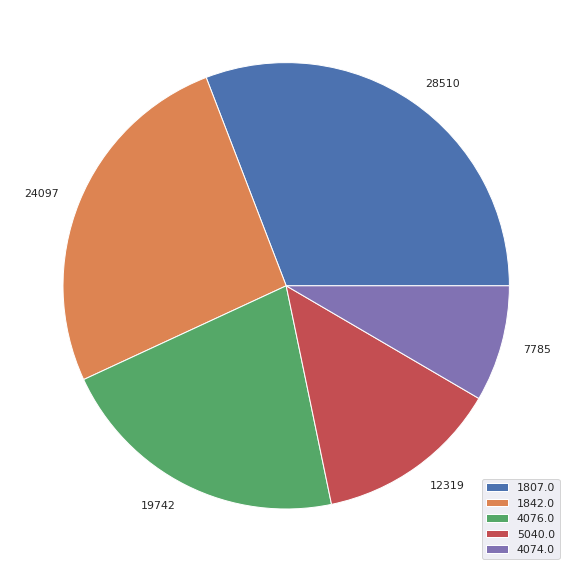

In [ ]:
plt.figure(figsize=(10,12))
plt.pie(dataset['Product_1'].value_counts().nlargest(5), labels=dataset['Product_1'].value_counts().nlargest(5))
plt.legend(dataset['Product_1'].value_counts().nlargest(5).index)
plt.show()

> Top 5 produk pada data adalah produk dengan kode 1807, 1842, 4076, 5040, dan 4074

In [ ]:
prod_1807 = dataset.loc[dataset['Product_1'] == 1807]
prod_1842 = dataset.loc[dataset['Product_1'] == 1842]
prod_4076 = dataset.loc[dataset['Product_1'] == 4076]
prod_5040 = dataset.loc[dataset['Product_1'] == 5040]
prod_4074 = dataset.loc[dataset['Product_1'] == 4074]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

Text(0.5, 1.0, 'Product 4074')

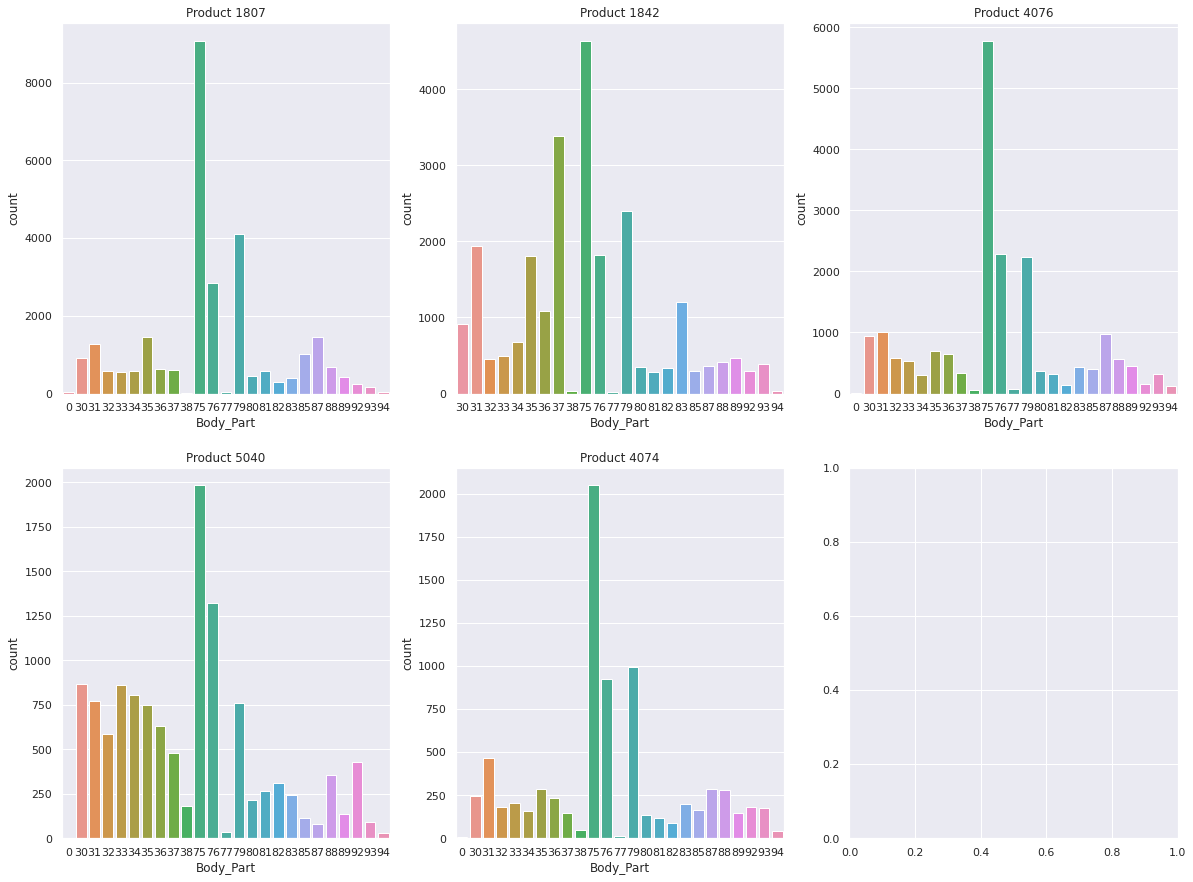

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,15))

sns.countplot(prod_1807['Body_Part'], ax=ax[0,0]).set_title('Product 1807')
sns.countplot(prod_1842['Body_Part'], ax=ax[0,1]).set_title('Product 1842')
sns.countplot(prod_4076['Body_Part'], ax=ax[0,2]).set_title('Product 4076')
sns.countplot(prod_5040['Body_Part'], ax=ax[1,0]).set_title('Product 5040')
sns.countplot(prod_4074['Body_Part'], ax=ax[1,1]).set_title('Product 4074')

> Untuk semua kode produk, bagian tubuh dengan label 75 (Head) merupakan bagian tubuh yang paling sering mengalami cedera, sementara bagian tubuh yang paling sering mengalami cedera kedua untuk tiap kode produk adalah sebagai berikut:
- Produk 1807: (79) Lower trunk
- Produk 1842: (37) Ankle
- Produk 4076: (76) Face
- Produk 5040: (76) Face
- Produk 4074: (79) Lower trunk

In [ ]:
top2_bp_1807 = prod_1807.loc[(prod_1807['Body_Part'] == 75) | (prod_1807['Body_Part'] == 79)]
top2_bp_1842 = prod_1842.loc[(prod_1842['Body_Part'] == 75) | (prod_1842['Body_Part'] == 37)]
top2_bp_4076 = prod_4076.loc[(prod_4076['Body_Part'] == 75) | (prod_4076['Body_Part'] == 76)]
top2_bp_5040 = prod_5040.loc[(prod_5040['Body_Part'] == 75) | (prod_5040['Body_Part'] == 76)]
top2_bp_4074 = prod_4074.loc[(prod_4074['Body_Part'] == 75) | (prod_4074['Body_Part'] == 79)]

Text(0.5, 1.0, 'Product 4074')

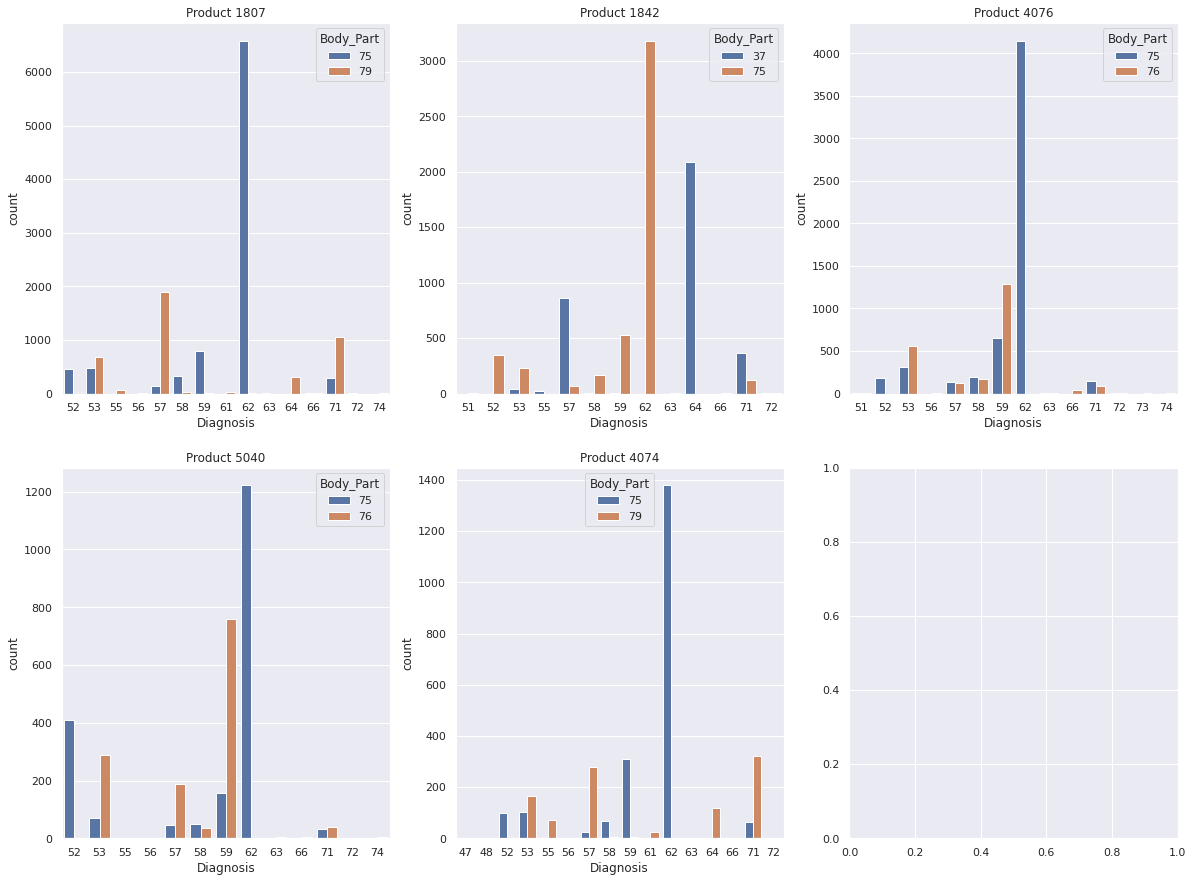

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,15))

sns.countplot(x='Diagnosis', hue='Body_Part', data=top2_bp_1807, ax=ax[0,0]).set_title('Product 1807')
sns.countplot(x='Diagnosis', hue='Body_Part', data=top2_bp_1842, ax=ax[0,1]).set_title('Product 1842')
sns.countplot(x='Diagnosis', hue='Body_Part', data=top2_bp_4076, ax=ax[0,2]).set_title('Product 4076')
sns.countplot(x='Diagnosis', hue='Body_Part', data=top2_bp_5040, ax=ax[1,0]).set_title('Product 5040')
sns.countplot(x='Diagnosis', hue='Body_Part', data=top2_bp_4074, ax=ax[1,1]).set_title('Product 4074')

> - Secara keseluruhan, diagnosis yang paling sering muncul untuk cedera bagian tubuh 75 (Head) adalah diagnosis 62 (Internal Organ Injury)
- Pada produk 1807, diagnosis yang paling sering muncul untuk cedera bagian tubuh 79 (Lower trunk) adalah diagnosis 57 (Fracture)
- Pada produk 1842, diagnosis yang paling sering muncul untuk cedera bagian tubuh 37 (Ankle) adalah diagnosis 64 (Strain, Sprain)
- Pada produk 4076, diagnosis yang paling sering muncul untuk cedera bagian tubuh 76 (Face) adalah diagnosis 59 (Laceration)
- Pada produk 5040, diagnosis yang paling sering muncul untuk cedera bagian tubuh 76 (Face) adalah diagnosis 59 (Laceration)
- Pada produk 4074, diagnosis yang paling sering muncul untuk cedera bagian tubuh 79 (Lower Trunk) adalah diagnosis 71 (Other/Not stated)

## Karakteristik dari cedera (atau penderitanya) yang terjadi karena self-infected

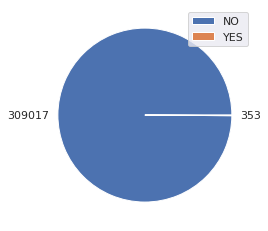

In [ ]:
data = dataset['Self_Inflicted'].value_counts()
plt.pie(dataset['Self_Inflicted'].value_counts(), labels=dataset['Self_Inflicted'].value_counts())
plt.legend(dataset['Self_Inflicted'].value_counts().index)
plt.show()

Terdapat 353 pasien yang terdiagnosis menyakiti dirinya sendiri

In [ ]:
self_inflicted = dataset.loc[(dataset['Self_Inflicted']=='YES')]

### Diagnosis Utama

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


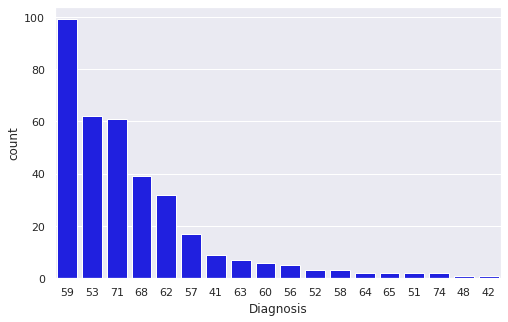

In [ ]:
plt.figure(figsize=(8,5))
diagnosis = dataset.loc[(dataset['Self_Inflicted']=='YES')]['Diagnosis']
sns.countplot(diagnosis, order= diagnosis.value_counts().index, color='blue')
plt.show()

Berdasarkan data tersebut pasien yang terdiagnosis menyakiti diri sendiri paling banyak karena terbeset benda tajam/cutting.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


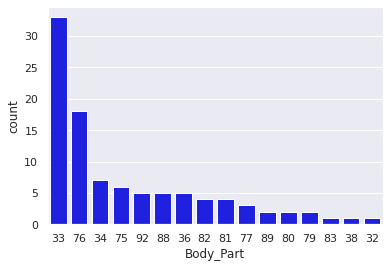

In [ ]:
cutting = dataset.loc[(dataset['Self_Inflicted']=='YES') & (dataset['Diagnosis'] == 59)]['Body_Part']
sns.countplot(cutting, order= cutting.value_counts().index, color='blue')
plt.show()

Pasien yang didiagnosis terbeset benda tajam paling banyak melakukannya di daerah lengan bawah.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


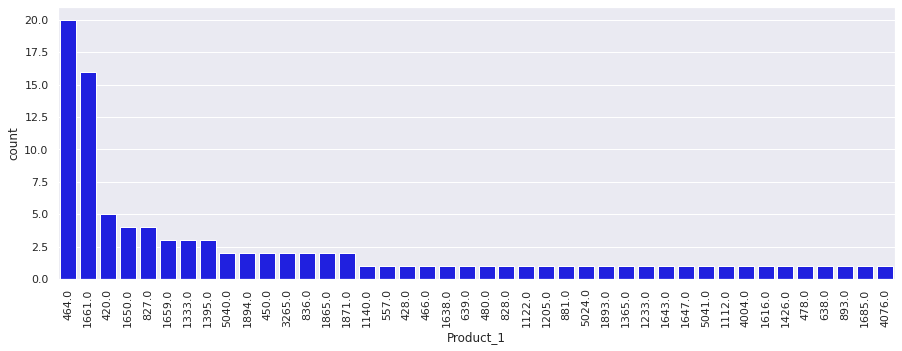

In [ ]:
product = dataset.loc[(dataset['Self_Inflicted']=='YES') & (dataset['Diagnosis'] == 59)]['Product_1']
plt.figure(figsize=(15,5))
ax = sns.countplot(product, order= product.value_counts().index, color='blue')
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

Produk pertama yang paling banyak digunakan untuk menyakiti diri sendiri adalah Pisau dan yang kedua adalah pisau cukur non elektrik

### Diagnosis kedua

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


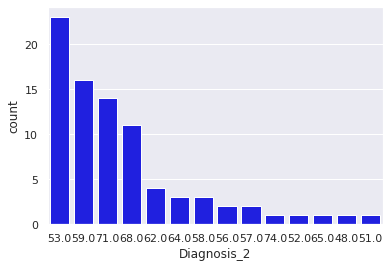

In [ ]:
diagnosis_2 = dataset.loc[(dataset['Self_Inflicted']=='YES')]['Diagnosis_2']
sns.countplot(diagnosis_2, order= diagnosis_2.value_counts().index, color='blue')
plt.show()

Diagnosis kedua dari pasien yang menyakiti diri sendiri paling banyak adalah memar.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


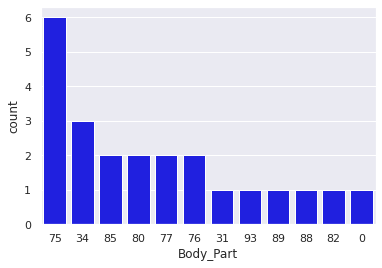

In [ ]:
memar = dataset.loc[(dataset['Self_Inflicted']=='YES') & (dataset['Diagnosis_2'] == 53)]['Body_Part']
sns.countplot(memar, order= memar.value_counts().index, color='blue')
plt.show()

Daerah yang paling sering memar adalah di kepala

### Alcohol and drug

In [ ]:
alcohol_drug = dataset.loc[(dataset['Self_Inflicted']=='YES') & ((dataset['Alcohol']==1) | (dataset['Drug']==1))]

In [ ]:
(alcohol_drug.shape[0]/self_inflicted.shape[0])*100

19.54674220963173

Hanya 19% pasien yang menyakiti diri sendiri berada di bawah pengaruh alkohol atau obat-obatan.

### Location

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


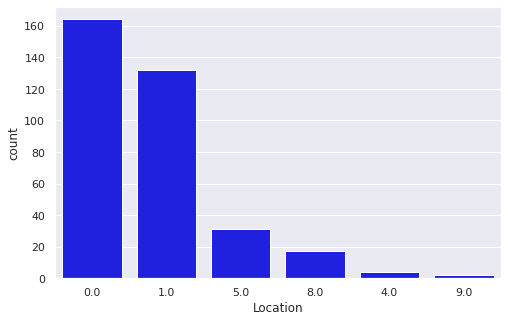

In [ ]:
plt.figure(figsize=(8,5))
location = dataset.loc[dataset['Self_Inflicted'] == 'YES']['Location']
sns.countplot(location, order= location.value_counts().index, color='blue')
plt.show()

Lokasi orang yang terdiagnosis menyakiti diri sendiri banyak yang tidak tercatat melakukan dimana, tetapi lokasi kedua yang sering menjadi tempat menyakiti diri sendiri adalah Rumah

## Karakteristik dari cedera (atau penderitanya) yang melibatkan api atau kebakaran

In [ ]:
dataset.head(10)

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Hispanic,Body_Part,Diagnosis,Other_Diagnosis,Body_Part_2,Diagnosis_2,Other_Diagnosis_2,Disposition,Location,Fire_Involvement,Product_1,Product_2,Product_3,Alcohol,Drug,Stratum,PSU,Weight,Self_Inflicted
0,200104302,2020-01-01,71,1,1.0,NaN,2,75,62,NaN,NaN,NaN,NaN,1.0,1.0,0,1893.0,1820,0,0,0,S,46,73.8005,NO
1,200104307,2020-01-01,208,1,0.0,NaN,0,76,53,NaN,NaN,NaN,NaN,1.0,1.0,0,4010.0,1807,0,0,0,S,46,73.8005,NO
2,200104308,2020-01-01,70,2,1.0,NaN,2,35,71,PAIN,NaN,NaN,NaN,1.0,1.0,0,1842.0,0,0,0,0,S,46,73.8005,NO
3,200104309,2020-01-01,24,1,1.0,NaN,2,93,53,NaN,NaN,NaN,NaN,1.0,1.0,0,131.0,0,0,0,0,S,46,73.8005,NO
4,200104310,2020-01-01,28,2,1.0,NaN,2,31,71,PAIN,NaN,NaN,NaN,1.0,1.0,0,3277.0,0,0,0,0,S,46,73.8005,NO
5,200104640,2020-01-01,8,1,1.0,NaN,2,33,57,NaN,NaN,NaN,NaN,1.0,1.0,0,661.0,1807,0,0,0,C,31,4.8510,NO
6,200104642,2020-01-01,7,2,2.0,NaN,2,75,59,NaN,NaN,NaN,NaN,1.0,0.0,0,1893.0,0,0,0,0,C,31,4.8510,NO
7,200104645,2020-01-01,2,1,1.0,NaN,2,75,62,NaN,NaN,NaN,NaN,1.0,1.0,0,4076.0,1807,0,0,0,C,31,4.8510,NO
8,200104646,2020-01-01,7,1,1.0,NaN,2,33,57,NaN,NaN,NaN,NaN,1.0,9.0,0,1233.0,0,0,0,0,C,31,4.8510,NO
9,200104650,2020-01-01,18,2,1.0,NaN,2,75,71,HEADACHE,NaN,NaN,NaN,1.0,1.0,0,649.0,0,0,0,0,C,31,4.8510,NO


In [ ]:
# Melihat kasus terbanyak berdasarkan label

dataset['Fire_Involvement'].value_counts()

0    307544
3       834
2       510
1       482
Name: Fire_Involvement, dtype: int64

In [ ]:
fire_0 = dataset.loc[dataset['Fire_Involvement'] == 0]
fire_1 = dataset.loc[dataset['Fire_Involvement'] == 1]
fire_2 = dataset.loc[dataset['Fire_Involvement'] == 2]
fire_3 = dataset.loc[dataset['Fire_Involvement'] == 3]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Bagian Tubuh yang Cedera dalam Kecelakaan yang melibatkan Api Label 1')

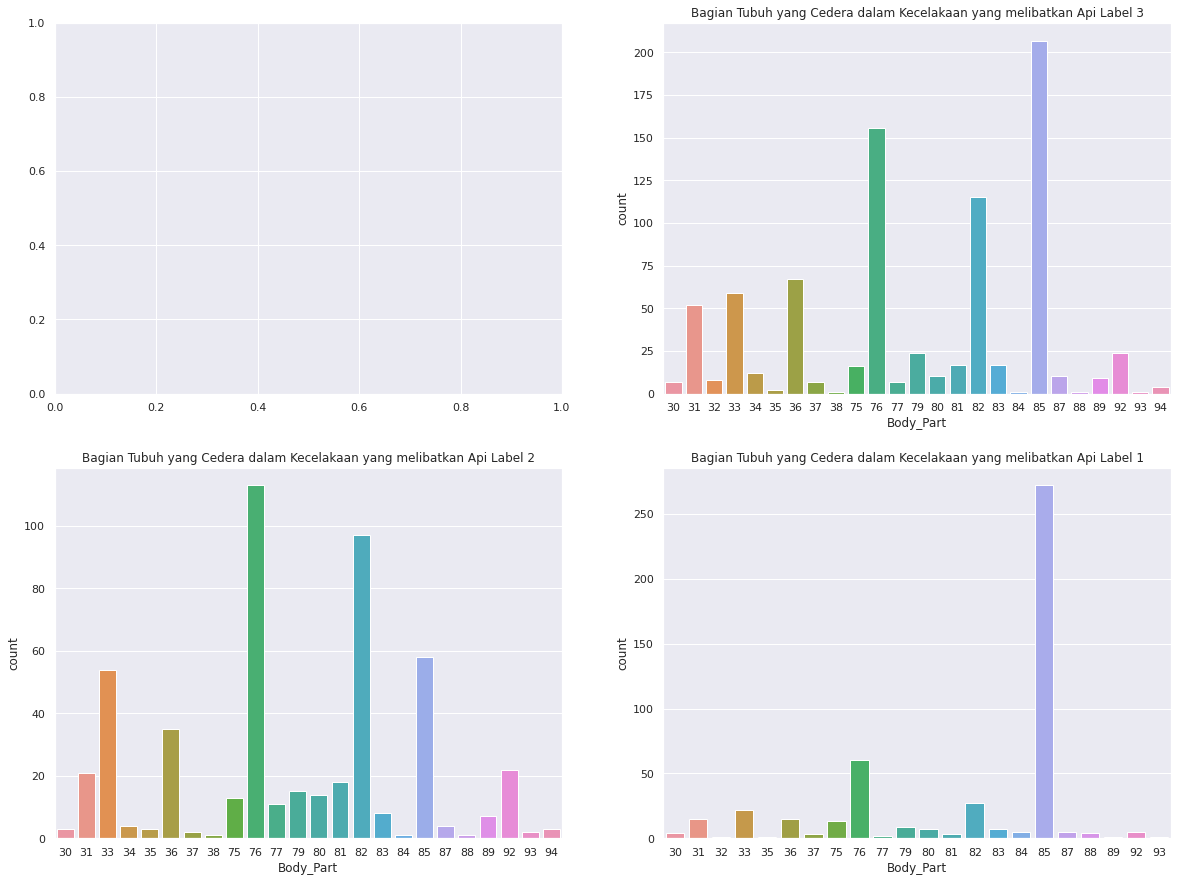

In [ ]:
# Melihat bagian tubuh yang cedera akibat kecelakaan yang melibatkan api

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,15))

f1_bp_3 = sns.countplot(fire_3['Body_Part'], ax=ax[0,1])
f1_bp_3.set_title("Bagian Tubuh yang Cedera dalam Kecelakaan yang melibatkan Api Label 3")
f1_bp_2 = sns.countplot(fire_2['Body_Part'], ax=ax[1,0])
f1_bp_2.set_title("Bagian Tubuh yang Cedera dalam Kecelakaan yang melibatkan Api Label 2")
f1_bp_1 = sns.countplot(fire_1['Body_Part'], ax=ax[1,1])
f1_bp_1.set_title("Bagian Tubuh yang Cedera dalam Kecelakaan yang melibatkan Api Label 1")

In [ ]:
bins= [2,12,16,30,45,110,201,212,223]
labels = ['Children','Teen','Young Adult','Middle-Aged Adults','Old Adult','Undefined','Baby','Toddler']
dataset['AgeGroup'] = pd.cut(dataset['Age'], bins=bins, labels=labels, right=False)
dataset['AgeGroup']

0           Old Adult
1                Baby
2           Old Adult
3         Young Adult
4         Young Adult
             ...     
309365           Baby
309366        Toddler
309367           Teen
309368       Children
309369           Baby
Name: AgeGroup, Length: 309370, dtype: category
Categories (8, object): ['Children' < 'Teen' < 'Young Adult' < 'Middle-Aged Adults' < 'Old Adult' <
                         'Undefined' < 'Baby' < 'Toddler']

In [ ]:
dataset['Age']

0          71
1         208
2          70
3          24
4          28
         ... 
309365    211
309366    218
309367     15
309368      3
309369    206
Name: Age, Length: 309370, dtype: int64

In [ ]:
fire_0 = dataset.loc[dataset['Fire_Involvement'] == 0]
fire_1 = dataset.loc[dataset['Fire_Involvement'] == 1]
fire_2 = dataset.loc[dataset['Fire_Involvement'] == 2]
fire_3 = dataset.loc[dataset['Fire_Involvement'] == 3]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Umur yang Cedera dalam Kecelakaan yang melibatkan Api Label 1')

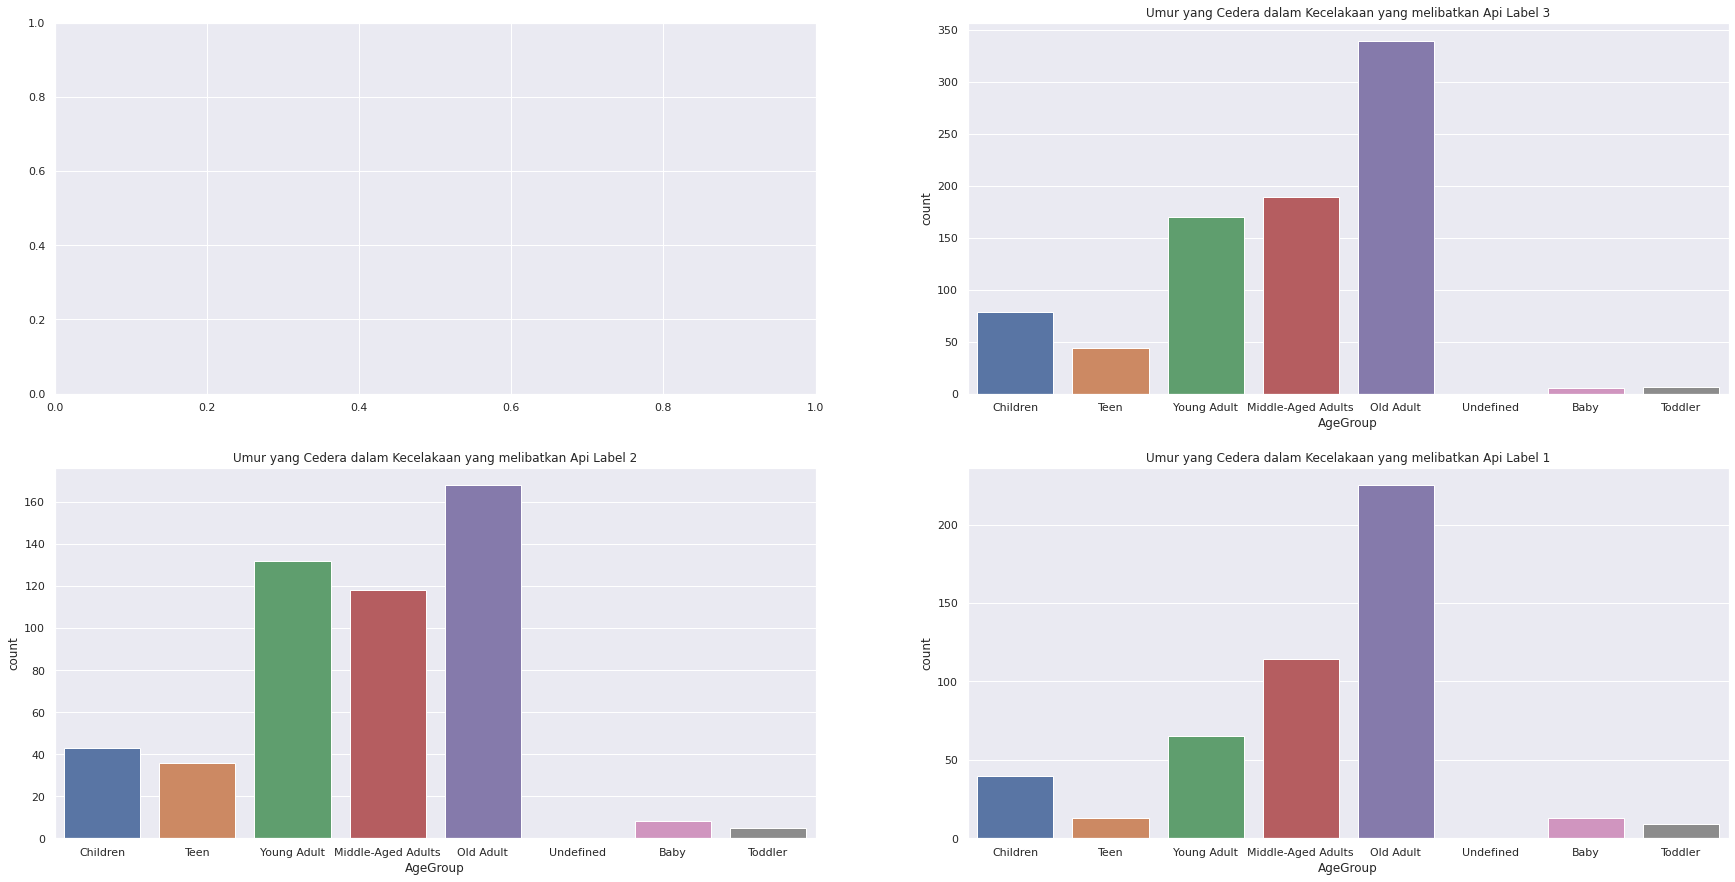

In [ ]:
# Melihat umur yang cedera akibat kecelakaan yang melibatkan api

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(30,15))

f1_bp_3 = sns.countplot(fire_3['AgeGroup'], ax=ax[0,1])
f1_bp_3.set_title("Umur yang Cedera dalam Kecelakaan yang melibatkan Api Label 3")
f1_bp_2 = sns.countplot(fire_2['AgeGroup'], ax=ax[1,0])
f1_bp_2.set_title("Umur yang Cedera dalam Kecelakaan yang melibatkan Api Label 2")
f1_bp_1 = sns.countplot(fire_1['AgeGroup'], ax=ax[1,1])
f1_bp_1.set_title("Umur yang Cedera dalam Kecelakaan yang melibatkan Api Label 1")

Secara keseluruhan cedera yang melibatkan api paling banyak terjadi pada kategori 'Old Adult' yaitu di atas 45 tahun

Text(0.5, 1.0, 'Cedera dengan keterlibatan api Label 1 berdasarkan Lokasi dan Jenis Kelamin')

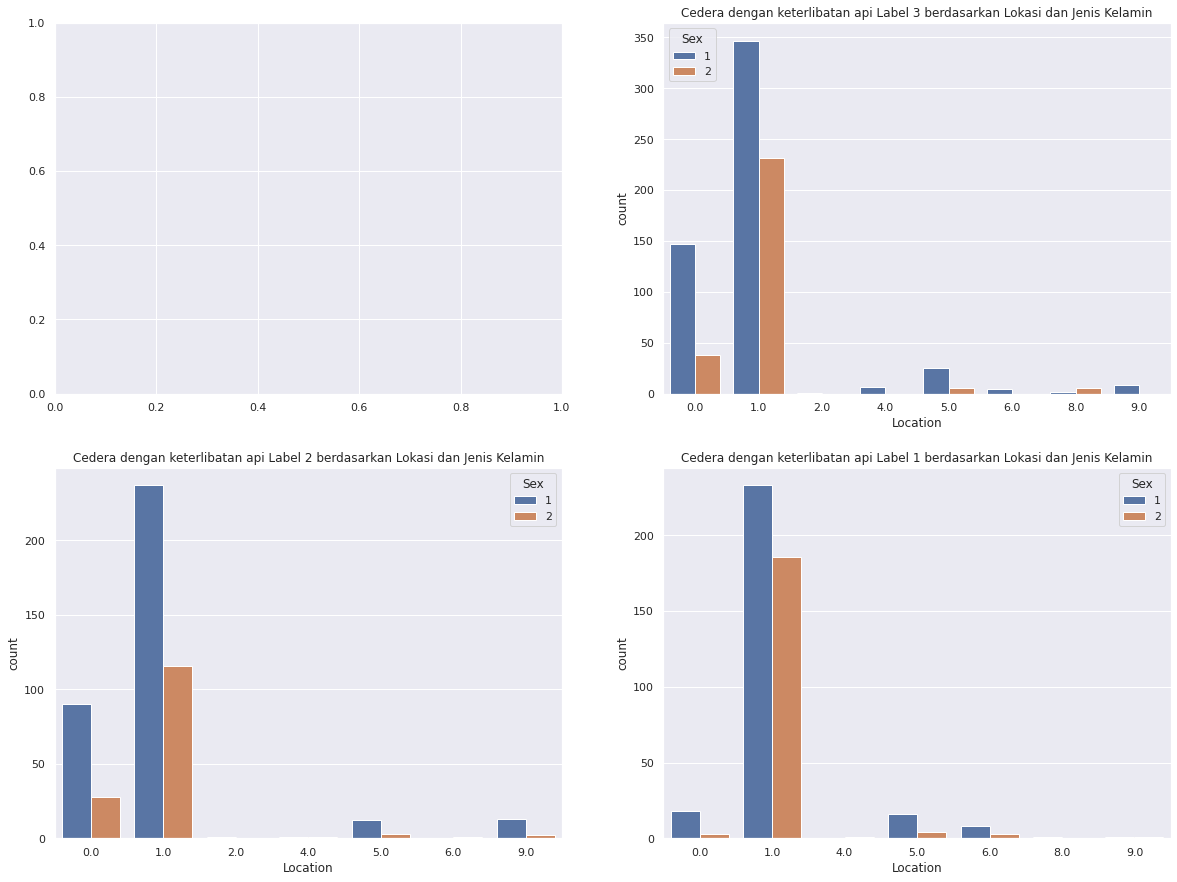

In [ ]:
# Melihat lokasi dan jenis kelamin dari orang yang cedera akibat kecelakaan yang melibatkan api

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,15))

fi_l_s_3 = sns.countplot(x='Location', hue='Sex', data=fire_3, ax=ax[0,1])
fi_l_s_3.set_title('Cedera dengan keterlibatan api Label 3 berdasarkan Lokasi dan Jenis Kelamin')
fi_l_s_2 = sns.countplot(x='Location', hue='Sex', data=fire_2, ax=ax[1,0])
fi_l_s_2.set_title('Cedera dengan keterlibatan api Label 2 berdasarkan Lokasi dan Jenis Kelamin')
fi_l_s_1 = sns.countplot(x='Location', hue='Sex', data=fire_1, ax=ax[1,1])
fi_l_s_1.set_title('Cedera dengan keterlibatan api Label 1 berdasarkan Lokasi dan Jenis Kelamin')


Text(0.5, 1.0, 'Keterlibatan alkohol pada Cedera dengan keterlibatan api Label 1')

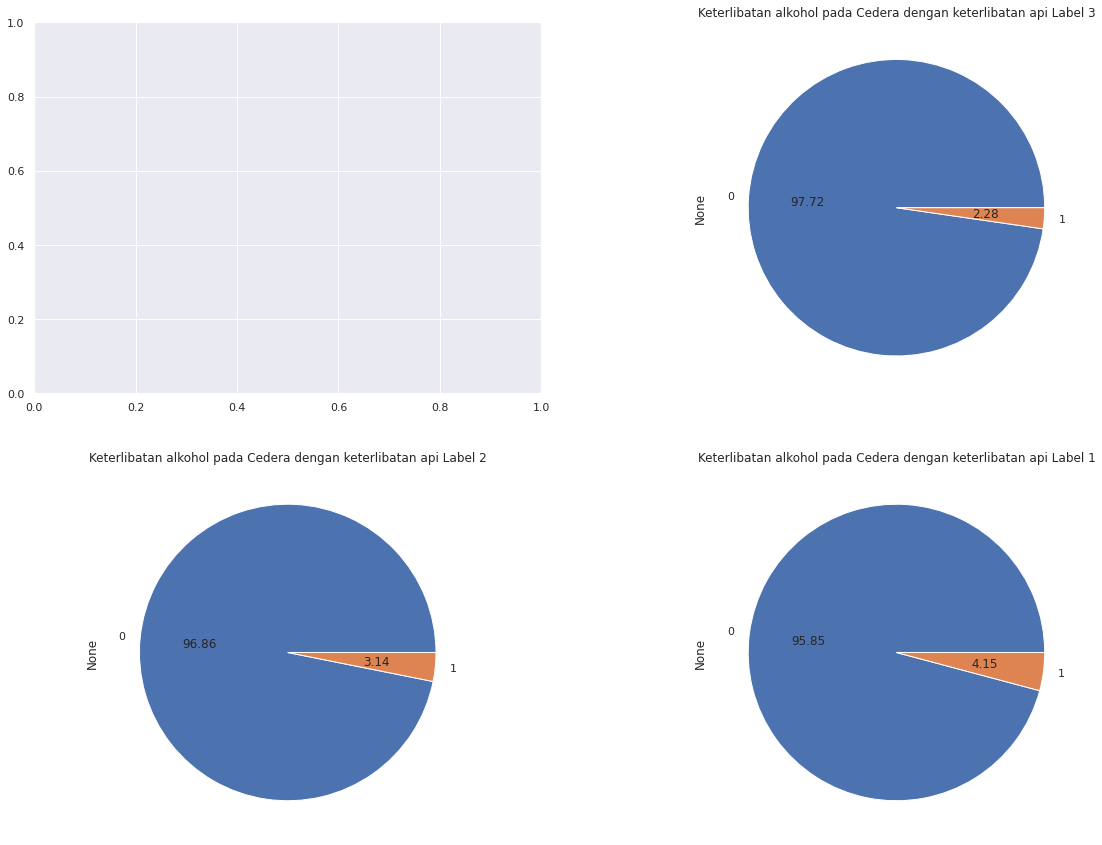

In [ ]:
# Melihat penggunaan alkohol dari orang yang cedera akibat kecelakaan yang melibatkan api

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,15))


fi_a_3 = fire_3.groupby('Alcohol').size().plot(kind='pie', autopct='%.2f',ax=ax[0,1])
fi_a_3.set_title('Keterlibatan alkohol pada Cedera dengan keterlibatan api Label 3')
fi_a_2 = fire_2.groupby('Alcohol').size().plot(kind='pie', autopct='%.2f',ax=ax[1,0])
fi_a_2.set_title('Keterlibatan alkohol pada Cedera dengan keterlibatan api Label 2')
fi_a_1 = fire_1.groupby('Alcohol').size().plot(kind='pie', autopct='%.2f',ax=ax[1,1])
fi_a_1.set_title('Keterlibatan alkohol pada Cedera dengan keterlibatan api Label 1')

Text(0.5, 1.0, 'Keterlibatan alkohol pada Cedera dengan keterlibatan api Label 1')

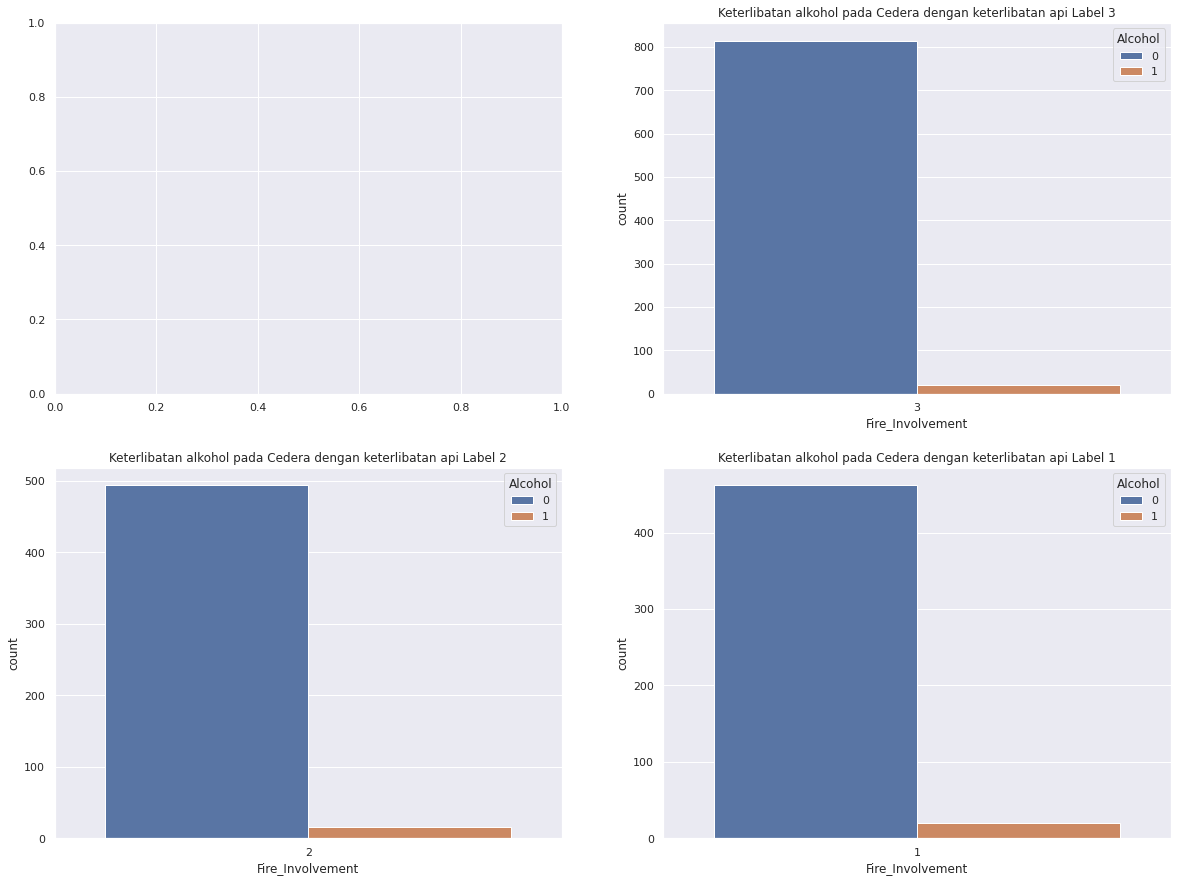

In [ ]:
# Melihat penggunaan alkohol dari orang yang cedera akibat kecelakaan yang melibatkan api

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,15))

fi_a_3 = sns.countplot(x='Fire_Involvement', hue='Alcohol', data=fire_3, ax=ax[0,1])
fi_a_3.set_title('Keterlibatan alkohol pada Cedera dengan keterlibatan api Label 3')
fi_a_2 = sns.countplot(x='Fire_Involvement', hue='Alcohol', data=fire_2, ax=ax[1,0])
fi_a_2.set_title('Keterlibatan alkohol pada Cedera dengan keterlibatan api Label 2')
fi_a_1 = sns.countplot(x='Fire_Involvement', hue='Alcohol', data=fire_1, ax=ax[1,1])
fi_a_1.set_title('Keterlibatan alkohol pada Cedera dengan keterlibatan api Label 1')

Text(0.5, 1.0, 'Keterlibatan obat-obatan pada Cedera dengan keterlibatan api Label 1')

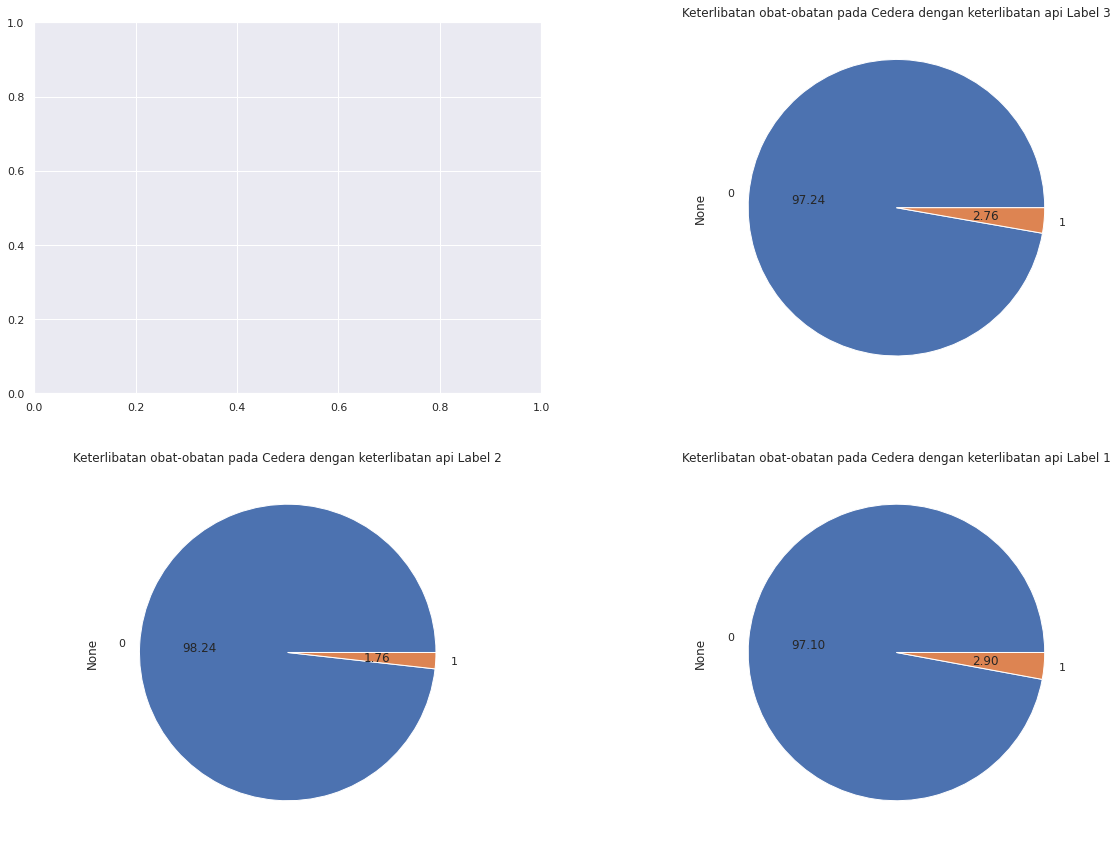

In [ ]:
# Melihat penggunaan obat-obatan dari orang yang cedera akibat kecelakaan yang melibatkan api

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,15))


fi_a_3 = fire_3.groupby('Drug').size().plot(kind='pie', autopct='%.2f',ax=ax[0,1])
fi_a_3.set_title('Keterlibatan obat-obatan pada Cedera dengan keterlibatan api Label 3')
fi_a_2 = fire_2.groupby('Drug').size().plot(kind='pie', autopct='%.2f',ax=ax[1,0])
fi_a_2.set_title('Keterlibatan obat-obatan pada Cedera dengan keterlibatan api Label 2')
fi_a_1 = fire_1.groupby('Drug').size().plot(kind='pie', autopct='%.2f',ax=ax[1,1])
fi_a_1.set_title('Keterlibatan obat-obatan pada Cedera dengan keterlibatan api Label 1')

Text(0.5, 1.0, 'Keterlibatan obat-obatan pada Cedera dengan keterlibatan api Label 1')

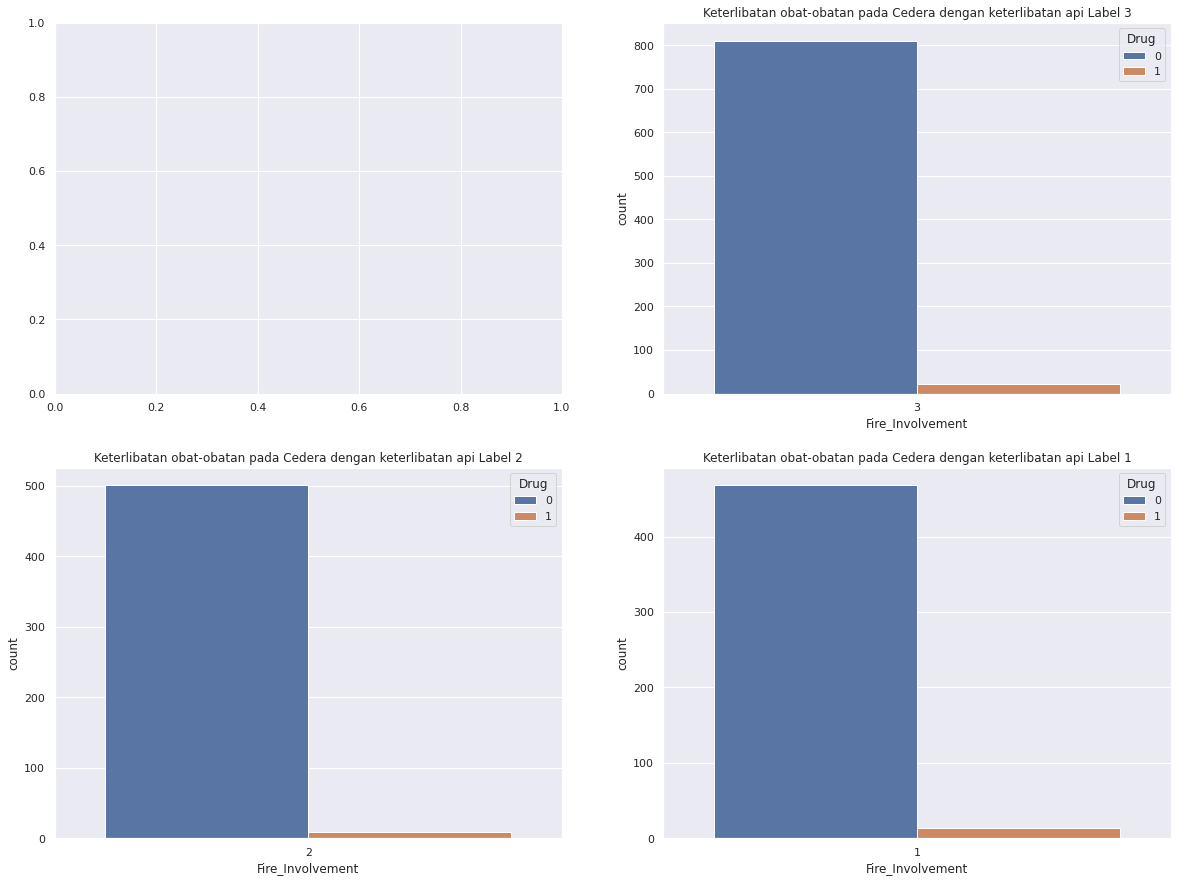

In [ ]:
# Melihat penggunaan obat-obatan dari orang yang cedera akibat kecelakaan yang melibatkan api

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,15))

fi_d_3 = sns.countplot(x='Fire_Involvement', hue='Drug', data=fire_3, ax=ax[0,1])
fi_d_3.set_title('Keterlibatan obat-obatan pada Cedera dengan keterlibatan api Label 3')
fi_d_2 = sns.countplot(x='Fire_Involvement', hue='Drug', data=fire_2, ax=ax[1,0])
fi_d_2.set_title('Keterlibatan obat-obatan pada Cedera dengan keterlibatan api Label 2')
fi_d_1 = sns.countplot(x='Fire_Involvement', hue='Drug', data=fire_1, ax=ax[1,1])
fi_d_1.set_title('Keterlibatan obat-obatan pada Cedera dengan keterlibatan api Label 1')

In [ ]:
dataset

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Hispanic,Body_Part,Diagnosis,Other_Diagnosis,Body_Part_2,Diagnosis_2,Other_Diagnosis_2,Disposition,Location,Fire_Involvement,Product_1,Product_2,Product_3,Alcohol,Drug,Stratum,PSU,Weight,Self_Inflicted,AgeGroup
0,200104302,2020-01-01,71,1,1.0,NaN,2,75,62,NaN,NaN,NaN,NaN,1.0,1.0,0,1893.0,1820,0,0,0,S,46,73.8005,NO,Old Adult
1,200104307,2020-01-01,208,1,0.0,NaN,0,76,53,NaN,NaN,NaN,NaN,1.0,1.0,0,4010.0,1807,0,0,0,S,46,73.8005,NO,Baby
2,200104308,2020-01-01,70,2,1.0,NaN,2,35,71,PAIN,NaN,NaN,NaN,1.0,1.0,0,1842.0,0,0,0,0,S,46,73.8005,NO,Old Adult
3,200104309,2020-01-01,24,1,1.0,NaN,2,93,53,NaN,NaN,NaN,NaN,1.0,1.0,0,131.0,0,0,0,0,S,46,73.8005,NO,Young Adult
4,200104310,2020-01-01,28,2,1.0,NaN,2,31,71,PAIN,NaN,NaN,NaN,1.0,1.0,0,3277.0,0,0,0,0,S,46,73.8005,NO,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309365,210305200,2020-12-21,211,1,4.0,NaN,2,76,71,NO INJURY,NaN,NaN,NaN,1.0,0.0,0,4074.0,0,0,0,0,C,10,4.8510,NO,Baby
309366,210305201,2020-12-21,218,2,2.0,NaN,2,33,57,NaN,NaN,NaN,NaN,1.0,0.0,0,4076.0,0,0,0,0,C,10,4.8510,NO,Toddler
309367,210305202,2020-12-21,15,1,1.0,NaN,1,83,64,NaN,NaN,NaN,NaN,1.0,0.0,0,1884.0,0,0,0,0,C,10,4.8510,NO,Teen
309368,210305205,2020-12-21,3,2,1.0,NaN,2,75,59,NaN,75.0,62.0,NaN,1.0,0.0,0,4076.0,4057,0,0,0,C,10,4.8510,NO,Children


In [ ]:
dataset = dataset.drop(columns='AgeGroup')

In [ ]:
dataset

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Hispanic,Body_Part,Diagnosis,Other_Diagnosis,Body_Part_2,Diagnosis_2,Other_Diagnosis_2,Disposition,Location,Fire_Involvement,Product_1,Product_2,Product_3,Alcohol,Drug,Stratum,PSU,Weight,Self_Inflicted
0,200104302,2020-01-01,71,1,1.0,NaN,2,75,62,NaN,NaN,NaN,NaN,1.0,1.0,0,1893.0,1820,0,0,0,S,46,73.8005,NO
1,200104307,2020-01-01,208,1,0.0,NaN,0,76,53,NaN,NaN,NaN,NaN,1.0,1.0,0,4010.0,1807,0,0,0,S,46,73.8005,NO
2,200104308,2020-01-01,70,2,1.0,NaN,2,35,71,PAIN,NaN,NaN,NaN,1.0,1.0,0,1842.0,0,0,0,0,S,46,73.8005,NO
3,200104309,2020-01-01,24,1,1.0,NaN,2,93,53,NaN,NaN,NaN,NaN,1.0,1.0,0,131.0,0,0,0,0,S,46,73.8005,NO
4,200104310,2020-01-01,28,2,1.0,NaN,2,31,71,PAIN,NaN,NaN,NaN,1.0,1.0,0,3277.0,0,0,0,0,S,46,73.8005,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309365,210305200,2020-12-21,211,1,4.0,NaN,2,76,71,NO INJURY,NaN,NaN,NaN,1.0,0.0,0,4074.0,0,0,0,0,C,10,4.8510,NO
309366,210305201,2020-12-21,218,2,2.0,NaN,2,33,57,NaN,NaN,NaN,NaN,1.0,0.0,0,4076.0,0,0,0,0,C,10,4.8510,NO
309367,210305202,2020-12-21,15,1,1.0,NaN,1,83,64,NaN,NaN,NaN,NaN,1.0,0.0,0,1884.0,0,0,0,0,C,10,4.8510,NO
309368,210305205,2020-12-21,3,2,1.0,NaN,2,75,59,NaN,75.0,62.0,NaN,1.0,0.0,0,4076.0,4057,0,0,0,C,10,4.8510,NO


### Kesimpulan


* Jumlah kejadian yang melibatkan api terbanyak adalah sebesar **307.544** kasus, dan berada di **Label** **0**  yaitu "**Tidak** **Ada** **Keterlibatan** **Api** **atau Keterlibatan** **Api Tidak Tercatat"**. Namun kami tidak akan berfokus pada label ini dikarenakan hasilnya tidak pasti.
* Untuk posisi kedua adalah sebesar **834** kasus di **Label 3** yaitu **"Ada Keterlibatan Api dan Kehadiran Pemadam Kebakaran yang Tidak Diketahui"**
* Untuk posisi ketiga adalah sebesar **510** kasus di **Label 2** yaitu **"Ada Keterlibatan Api dan Tidak Dihadiri Petugas Pemadam Kebakaran"**
* Untuk posisi keempat adalah sebesar **482** kasus di **Label 1** yaitu **"Ada Keterlibatan Api dan Dihadiri Petugas Pemadam Kebakaran"**

---
Melihat hubungan cedera akibat kecelakaan yang melibatkan api dengan bagian 
tubuh yang terkena :
* Cedera dengan keterlibatan api kategori 3 paling banyak terjadi di seluruh bagian tubuh (Label 85).
* Cedera dengan keterlibatan api kategori 2 paling banyak terjadi di wajah (Label 76).
* Cedera dengan keterlibatan api kategori 1 paling banyak terjadi di seluruh bagian tubuh (Label 85).

---
Melihat hubungan cedera akibat kecelakaan yang melibatkan api dengan lokasi kejadian dan jenis kelamin:
* Dari semua label, kejadian cedera yang melibatkan api terbanyak terjadi di rumah (Label 1)
* Secara keseluruhan, kejadian cedera yang melibatkan api lebih banyak menimpa laki-laki daripada perempuan

---
Melihat hubungan cedera akibat kecelakaan yang melibatkan api dengan umur :
* Secara keseluruhan kejadian cedera paling banyak menimpa orang yang masuk ke kategori "Old Adults" yaitu dengan umur diatas 45 tahun.

---
Melihat hubungan cedera akibat kecelakaan yang melibatkan api dengan alkohol maupun obat-obatan :
* Secara keseluruhan persentase keterlibatan obat-obatan dan alkohol sangatlah kecil, yaitu di bawah 4.15 persen


# Data preprocessing

## Drop Irrelevant Feature

### Diagnosis_2, Treatment_Date, CPSC_Case_Number

In [7]:
(dataset['Diagnosis_2'].isnull().sum()/dataset['Diagnosis_2'].shape[0])*100

78.80919287584446

Jumlah missing values pada diagnosis 2 hampir sejumlah 80% dari keseluruhan data. Maka dari itu, menurut kami kolom ini dan yang berkaitan (other_diagnosis_2 dan body_part_2) bisa di drop saja dibandingkan diisi karena dapat menimbulkan bias 

In [8]:
dataset_no_irrelevant = dataset.drop(columns=['Diagnosis_2','Other_Diagnosis_2','Body_Part_2',
                                              'Treatment_Date', 'CPSC_Case_Number'])

## Duplicate Data

In [9]:
# Jumlah duplikasi data
print("Jumlah baris data yang duplikat adalah " + str(dataset.duplicated().sum()))

Jumlah baris data yang duplikat adalah 0


In [10]:
# Men-drop row data yang redundan
print("Jumlah baris dan kolom sebelum menghilangkan redundansi data " + str(dataset.shape))

dataset_no_dup = dataset_no_irrelevant.drop_duplicates()

print("")
print("Jumlah baris dan kolom setelah menghilangkan redundansi data " + str(dataset_no_dup.shape))
print("Jumlah baris data yang duplikat adalah " + str(dataset_no_dup.duplicated().sum()))

Jumlah baris dan kolom sebelum menghilangkan redundansi data (309370, 25)

Jumlah baris dan kolom setelah menghilangkan redundansi data (302365, 20)
Jumlah baris data yang duplikat adalah 0


## Missing Value

In [11]:
dataset_no_null = dataset_no_dup.copy()

In [12]:
dataset_no_null.isnull().sum()

Age                      0
Sex                      0
Race                  2856
Other_Race          294744
Hispanic                 0
Body_Part                0
Diagnosis                0
Other_Diagnosis     250011
Disposition           1547
Location              5518
Fire_Involvement         0
Product_1             2123
Product_2                0
Product_3                0
Alcohol                  0
Drug                     0
Stratum               6163
PSU                      0
Weight                   0
Self_Inflicted           0
dtype: int64

##### Fitur Race

In [13]:
missing_Race = dataset_no_null['Race']

In [14]:
missing_Race.mode()[0]

1.0

In [15]:
dataset_no_null = dataset_no_null.fillna(value={'Race' : missing_Race.mode()[0]})

##### Fitur Product_1

In [16]:
missing_Product_1 = dataset_no_null['Product_1']

In [17]:
missing_Product_1.mode()[0]

1807.0

In [18]:
dataset_no_null = dataset_no_null.fillna(value={'Race' : missing_Product_1.mode()[0]})

##### Fitur Disposition

In [19]:
missing_Disposition = dataset_no_null['Disposition']

In [20]:
missing_Disposition.mode()[0]

1.0

In [21]:
dataset_no_null = dataset_no_null.fillna(value={'Disposition' : missing_Disposition.mode()[0]})

##### Fitur Location

In [22]:
missing_Location = dataset_no_null['Location']

In [23]:
missing_Location.mode()[0]

1.0

In [24]:
dataset_no_null = dataset_no_null.fillna(value={'Location' : missing_Location.mode()[0]})

##### Fitur Product_1 

In [25]:
missing_Product_1 = dataset_no_null['Product_1']

In [26]:
missing_Product_1.mode()[0]

1807.0

In [27]:
dataset_no_null = dataset_no_null.fillna(value={'Product_1' : missing_Product_1.mode()[0]})

##### Fitur Stratum

In [28]:
missing_Stratum = dataset_no_null['Stratum']

In [29]:
missing_Stratum.mode()[0]

'V'

In [30]:
dataset_no_null = dataset_no_null.fillna(value={'Stratum' : missing_Stratum.mode()[0]})

In [31]:
dataset_no_null.isnull().sum()

Age                      0
Sex                      0
Race                     0
Other_Race          294744
Hispanic                 0
Body_Part                0
Diagnosis                0
Other_Diagnosis     250011
Disposition              0
Location                 0
Fire_Involvement         0
Product_1                0
Product_2                0
Product_3                0
Alcohol                  0
Drug                     0
Stratum                  0
PSU                      0
Weight                   0
Self_Inflicted           0
dtype: int64

## Age

In [32]:
import math

def to_year(age):
  if age >= 200:
    age -= 200

    if age < 12:
      return 0
    elif 12 <= age <= 23:
      return 1
    else:
      return None

  else:
    return age

In [33]:
dataset_no_null['Age'] = dataset_no_null['Age'].apply(to_year)
dataset_no_null

,Age,Sex,Race,Other_Race,Hispanic,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Product_3,Alcohol,Drug,Stratum,PSU,Weight,Self_Inflicted
0,71,1,1.0,NaN,2,75,62,NaN,1.0,1.0,0,1893.0,1820,0,0,0,S,46,73.8005,NO
1,0,1,0.0,NaN,0,76,53,NaN,1.0,1.0,0,4010.0,1807,0,0,0,S,46,73.8005,NO
2,70,2,1.0,NaN,2,35,71,PAIN,1.0,1.0,0,1842.0,0,0,0,0,S,46,73.8005,NO
3,24,1,1.0,NaN,2,93,53,NaN,1.0,1.0,0,131.0,0,0,0,0,S,46,73.8005,NO
4,28,2,1.0,NaN,2,31,71,PAIN,1.0,1.0,0,3277.0,0,0,0,0,S,46,73.8005,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309365,0,1,4.0,NaN,2,76,71,NO INJURY,1.0,0.0,0,4074.0,0,0,0,0,C,10,4.8510,NO
309366,1,2,2.0,NaN,2,33,57,NaN,1.0,0.0,0,4076.0,0,0,0,0,C,10,4.8510,NO
309367,15,1,1.0,NaN,1,83,64,NaN,1.0,0.0,0,1884.0,0,0,0,0,C,10,4.8510,NO
309368,3,2,1.0,NaN,2,75,59,NaN,1.0,0.0,0,4076.0,4057,0,0,0,C,10,4.8510,NO


## Stratum

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le = LabelEncoder()
dataset_no_null['Stratum'] = le.fit_transform(dataset_no_null['Stratum'])

In [36]:
dataset_no_null.Stratum.unique()

array([3, 0, 4, 1, 2])

## Self_Inflicted

In [37]:
dataset_no_null['Self_Inflicted'] = dataset_no_null['Self_Inflicted'].map({'YES':1,'NO':0})

In [38]:
dataset_no_null.head()

,Age,Sex,Race,Other_Race,Hispanic,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Product_3,Alcohol,Drug,Stratum,PSU,Weight,Self_Inflicted
0,71,1,1.0,NaN,2,75,62,NaN,1.0,1.0,0,1893.0,1820,0,0,0,3,46,73.8005,0
1,0,1,0.0,NaN,0,76,53,NaN,1.0,1.0,0,4010.0,1807,0,0,0,3,46,73.8005,0
2,70,2,1.0,NaN,2,35,71,PAIN,1.0,1.0,0,1842.0,0,0,0,0,3,46,73.8005,0
3,24,1,1.0,NaN,2,93,53,NaN,1.0,1.0,0,131.0,0,0,0,0,3,46,73.8005,0
4,28,2,1.0,NaN,2,31,71,PAIN,1.0,1.0,0,3277.0,0,0,0,0,3,46,73.8005,0


### Dignosis Kerusakan Pada Organ atau Saraf

In [39]:
def internal_organ(x):
  if(x==62):
    return 1
  else :
    return 0

In [40]:
dataset_no_null['Internal_Organ_Injury'] = dataset_no_null['Diagnosis'].apply(internal_organ)

## Outliers

In [41]:
# Fungsi untuk mengecek banyaknya outliers pada setiap fitur
def check_outliers(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1

  print("Total outliers: ")
  print(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum())


# Fungsi untuk menghapus outliers pada setiap fitur
def delete_outliers(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3-Q1

  return df[ ~((df < (Q1 - 1.5*IQR)) | (df > (Q3 + 1.5*IQR))).any(axis=1) ]

In [42]:
# check_outliers(dataset_no_null)
# dataset_no_null.shape

Data yang memiliki outlier merupakan data yang bersifat kategorikal sehingga tidak perlu dilakukan drop outlier

## Kategorisasi

### Weight


Melakukan mapping pada nilai weight karena nilai dari kolom tersebut berupa kategori dalam bentuk float menjadi binary encode.

In [43]:
cleaned_dataset = dataset_no_null.copy()
cleaned_dataset = cleaned_dataset.reset_index()
cleaned_dataset = cleaned_dataset.drop(['index'], axis=1)

In [44]:
weight = cleaned_dataset['Weight'].value_counts()
weight = weight.sort_index(ascending=True)

In [45]:
weights = {}
j = 0
for i in weight.index :
  weights[i] = j
  j += 1

In [46]:
cleaned_dataset['Weight'] = cleaned_dataset['Weight'].map(weights)

### Diagnosis

#### Function

In [47]:
def no_stated(x):  
  if not pd.isna(x) :
    a = re.match(r'(NOT STATED)', x)
    b = re.match(r'(NS)', x)
    c = re.match(r'(N.S)', x)
    d = re.match(r'(N.S.)', x)
    e = re.match(r'(NONE)', x)
    f =  re.match(r'(NO DIAGNOSIS FOUND)', x)
    if(a != None or b!= None or c!= None or d!= None or e != None ) :
      return None
  return x

def group_pain(x) :
  if not pd.isna(x) : 
    if ('PAIN' in x or 'CERVICALGIA' in x or 'TRAUMA' in x or 'WEAKNESS' in x or 'TORTICOLLIS' in x  or 'TENDERNESS' in x  or 'BLISTERS' in x or 'BLISTER' in x  or 'DORSALGIA' in x  or 'BURSITIS' in x):
      return "PAIN"
    elif('CRAMPS' in x or 'SPASM' in x or 'RHABDOMYOLYSIS' in x or 'TENOSYNOVITIS' in x or 'MYALIGIA' in x) :
      return 'CRAMPS'
    elif('ERYTHEMA' in x or 'IRRITATION' in x or 'NUMBNESS' in x or 'TENDONITIS' in x) :
      return 'IRRITATION'
    elif('INJURY' in x or 'INJ' in x or 'ACCIDENT' in x or 'CHEMICAL EXPOSURE' in x or 'WOUND' in x or 'FALL' in x or 'GSW' in x or 'GUN' in x or 'BITE' in x or 'HYPHEMA' in x or 'BEE STING' in x or 'SWELLING' in x or 'SWOLLEN' in x) :
      return 'INJURY'
    elif('HEADACHE' in x or 'DIZZINESS' in x or 'VERTIGO' in x or 'LIGHTHEADNESS' in x):
      return 'HEADACHE'
    elif('INFECTION' in x or 'INFECTED' in x or 'ABSCESS' in x or 'CELLULITIS' in x or 'ABCESS' in x or 'PARONYCHIA' in x) :
      return 'INFECTION'
    elif('HERNIA' in x) :
      return 'HERNIA'
    elif('EFFUSION' in x):
      return 'EFFUSION'
    elif('OTITIS' in x or "SWIMMER'S EAR" in x or 'SWIMMERS EAR' in x or 'OTALGIA' in x):
      return 'OTALGIA'
    elif('SHORTNESS OF BREATH' in x or 'SOB' in x or 'ASTHMA' in x or 'DYSPNEA' in x) :
      return 'SHORTNESS OF BREATH'
    elif('SYNCOPE' in x or 'CARDIAC ARREST' in x or 'SEIZURE' in x or 'PALPITATIONS' in x or 'PALPITATION' in x) :
      return 'SYNCOPE'
    elif('HEAT EXHAUSTION' in x or 'DEHYDRATION' in x) :
      return 'HEAT EXHAUSTION'
  return x

def change_diagnosis(x) :
  if x not in other_diagnosis :
    return 71
  else :
    idx = other_diagnosis.index(x) + 75
    return idx
def move(df) :
  for i in range(df.shape[0]) :
    if(df.at[i, 'Diagnosis'] != 71) :
      df.at[i, 'Other_Diagnosis'] = df.at[i, 'Diagnosis']

#### Process

In [48]:
cleaned_dataset['Other_Diagnosis'] = cleaned_dataset['Other_Diagnosis'].apply(group_pain)
cleaned_dataset['Other_Diagnosis'] = cleaned_dataset['Other_Diagnosis'].apply(no_stated)

In [49]:
other_diagnosis = cleaned_dataset['Other_Diagnosis'].value_counts().head(15).index.tolist()

In [50]:
cleaned_dataset['Other_Diagnosis'] = cleaned_dataset['Other_Diagnosis'].apply(change_diagnosis)

In [51]:
move(cleaned_dataset)

In [52]:
cleaned_dataset = cleaned_dataset.dropna(subset=['Other_Diagnosis'])
cleaned_dataset = cleaned_dataset.reset_index()

In [53]:
cleaned_dataset = cleaned_dataset.drop(['index','Diagnosis'], axis=1)

In [54]:
cleaned_dataset = cleaned_dataset.rename(columns={"Other_Diagnosis": "Diagnosis"})

### Race

#### Function

In [55]:
def change_race(x) :
  if not pd.isna(x) :
    if x == 'NS' or x == 'NOT STATED' or x =='UNKNOWN':
      return 0
    elif(x == 'AFRICAN') :
      return 2
    elif('MULTI-RACIAL' in x or 'MULTI' in x) :
      return 7  
    else :
      return 3
      
def move_race(df):
  for i in range(df.shape[0]) :
    if(df.at[i, 'Race'] != 3.0) :
      df.at[i, 'Other_Race'] = df.at[i, 'Race']

#### Process

In [56]:
cleaned_dataset['Other_Race'] = cleaned_dataset['Other_Race'].apply(change_race)

In [57]:
move_race(cleaned_dataset)

In [58]:
cleaned_dataset = cleaned_dataset.dropna(subset=['Other_Race'])
cleaned_dataset = cleaned_dataset.reset_index()

In [59]:
cleaned_dataset = cleaned_dataset.drop(['index','Race'], axis=1)

In [60]:
cleaned_dataset = cleaned_dataset.rename(columns={"Other_Race": "Race"})


## Standarisasi

In [61]:
scaler = StandardScaler()

In [62]:
age_weight = cleaned_dataset[['Age', 'Weight']]
age_weight

,Age,Weight
0,71,4
1,0,4
2,70,4
3,24,4
4,28,4
...,...,...
302360,0,0
302361,1,0
302362,15,0
302363,3,0


In [63]:
scaler.fit_transform(age_weight)
age_weight

,Age,Weight
0,71,4
1,0,4
2,70,4
3,24,4
4,28,4
...,...,...
302360,0,0
302361,1,0
302362,15,0
302363,3,0


In [64]:
dataset_standarized = cleaned_dataset.copy()
dataset_standarized['Age'] = age_weight['Age']
dataset_standarized['Weight'] = age_weight['Weight']

# Model

## Lakukan analisis cluster yang dapat terbentuk pada kelompok cedera karena self inflicted. Deskripsikan karakteristik dari masing-masing cluster yang didapatkan?

In [ ]:
self_inflicted = dataset_standarized.loc[(dataset_standarized['Self_Inflicted']==1)]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2909.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 2909.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 2909.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 2909.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 2909.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 60, cost: 2656.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 72, cost: 2612.0
Run 2, iteration: 2/100, moves: 10, cost: 2612.0
Init: initializing centroids
In

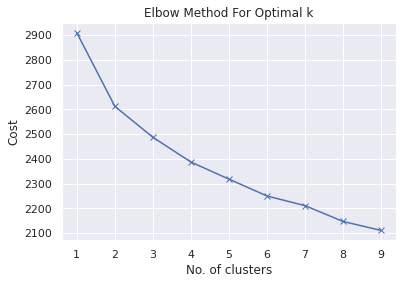

In [ ]:
# Elbow curve to find optimal K
cost = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(self_inflicted)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
kmodes = KModes(n_clusters = 2, random_state=123)

cluster = kmodes.fit_predict(self_inflicted)
cluster

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,

In [ ]:
self_inflicted_clustered = self_inflicted.copy()

self_inflicted_clustered['cluster'] = cluster
self_inflicted_clustered.head()

,Age,Sex,Race,Hispanic,Body_Part,Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Product_3,Alcohol,Drug,Stratum,PSU,Weight,Self_Inflicted,Internal_Organ_Injury,cluster
1929,30,2,1.0,2,85,68,2.0,1.0,0,464.0,0,0,1,0,2,68,6,1,0,0
2383,8,1,0.0,0,77,84,4.0,8.0,0,4057.0,0,0,0,0,4,21,1,1,0,1
2943,11,2,0.0,0,33,59,1.0,1.0,0,1659.0,0,0,0,0,4,21,1,1,0,1
6440,12,1,1.0,2,75,52,1.0,0.0,0,5041.0,5016,0,0,0,2,101,6,1,0,0
10893,31,1,1.0,1,75,62,1.0,0.0,0,4057.0,0,0,0,0,4,40,1,1,1,0


In [ ]:
self_inflicted_cluster_0 = self_inflicted_clustered.loc[(self_inflicted_clustered['cluster']==0)]
self_inflicted_cluster_1 = self_inflicted_clustered.loc[(self_inflicted_clustered['cluster']==1)]

#### Body Part

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


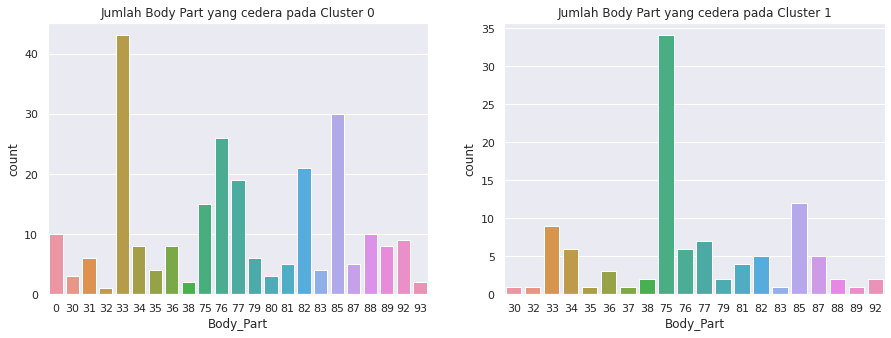

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

cp = sns.countplot(self_inflicted_cluster_0['Body_Part'], ax=ax[0])
cp.set_title('Jumlah Body Part yang cedera pada Cluster 0')
cp2 = sns.countplot(self_inflicted_cluster_1['Body_Part'], ax=ax[1])
cp2.set_title('Jumlah Body Part yang cedera pada Cluster 1')
# Show the plot
plt.show()

Jumlah body part yang paling banyak terkena pada dua cluster tersebut sama, yaitu Lower Arm (33)

#### Diagnosis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


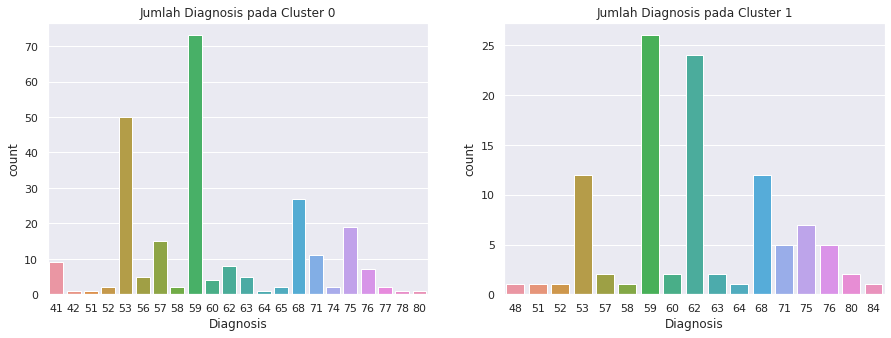

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

cp = sns.countplot(self_inflicted_cluster_0['Diagnosis'], ax=ax[0])
cp.set_title('Jumlah Diagnosis pada Cluster 0')
cp2 = sns.countplot(self_inflicted_cluster_1['Diagnosis'], ax=ax[1])
cp2.set_title('Jumlah Diagnosis pada Cluster 1')

# Show the plot
plt.show()

Antara dua cluster tersebut diagnosis yang paling banyak adalah Laceration atau terluka dengan benda tajam

#### Race

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


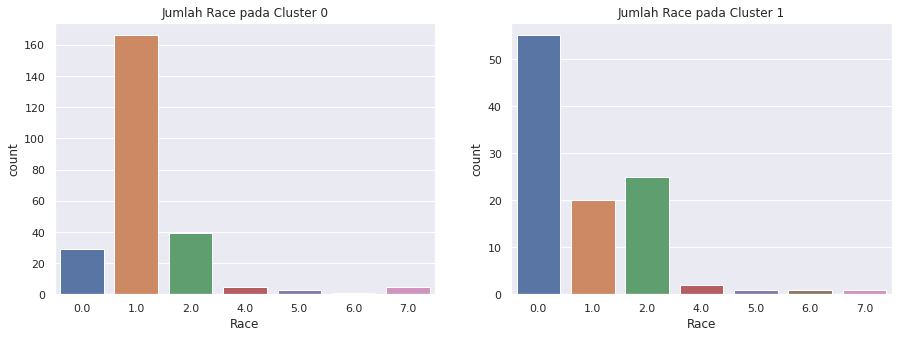

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

cp = sns.countplot(self_inflicted_cluster_0['Race'], ax=ax[0])
cp.set_title('Jumlah Race pada Cluster 0')
cp2 = sns.countplot(self_inflicted_cluster_1['Race'], ax=ax[1])
cp2.set_title('Jumlah Race pada Cluster 1')

# Show the plot
plt.show()

Pada cluster 0 didiagnosis yang didiagnosis self-inflicted adalah orang dengan ras White sedangkan untuk cluster 1 kebanyakkan tidak tercatat.

#### Location

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


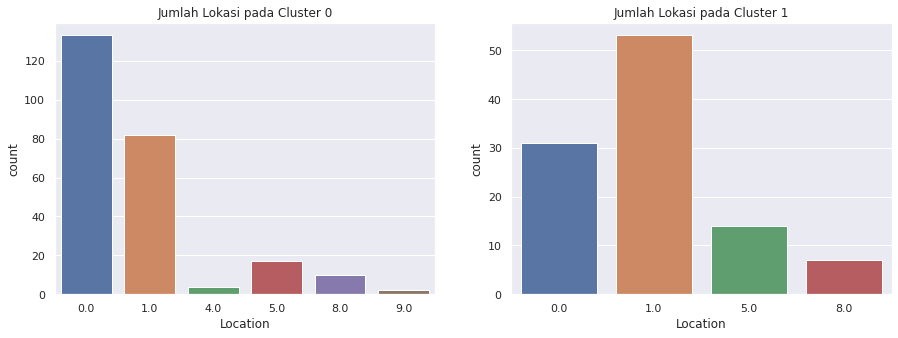

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

cp = sns.countplot(self_inflicted_cluster_0['Location'], ax=ax[0])
cp.set_title('Jumlah Lokasi pada Cluster 0')
cp2 = sns.countplot(self_inflicted_cluster_1['Location'], ax=ax[1])
cp2.set_title('Jumlah Lokasi pada Cluster 1')

# Show the plot
plt.show()

Pada cluster 1 didiagnosis yang didiagnosis self-inflicted melakukannya di rumah sedangkan untuk cluster 0 kebanyakkan tidak tercatat.

## Buatlah model untuk memprediksi adanya kasus cedera yang self inflicted.

### Split data to training, validation, and test

In [75]:
# Variabel independen
x = dataset_standarized.drop(["Self_Inflicted"], axis = 1)
x.head()

# Variabel dependen
y = dataset_standarized["Self_Inflicted"]

y.value_counts()

0    302012
1       353
Name: Self_Inflicted, dtype: int64

In [76]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123, stratify=y)

In [77]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

# summarize class distribution
print("Before oversampling: ", Counter(y_train))

# define oversampling strategy
SMOTE = SMOTE(sampling_strategy='auto')

# fit and apply the transform
x_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x_train, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))

Before oversampling:  Counter({0: 241610, 1: 282})
After oversampling:  Counter({0: 241610, 1: 241610})


### Training, Testing dan Evaluasi

In [78]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score, ConfusionMatrixDisplay

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier


def evaluate_classifier_performance(classifier, prediction, y_test = y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi:\n\n%s\n" % (classification_report(y_test, classifier.predict(x_test))))

    # Butuh informasi lebih lengkap? silakan disimak di bawah ini
    print('Accuracy:', accuracy_score(y_test, prediction))
    print('Precision:', precision_score(y_test, prediction))
    print('Recall:', recall_score(y_test, prediction))
    print('F1 Average:', f1_score(y_test, prediction))

    # Confusion Matrix
    print("\n\nConfusion Matrix\n")
    ConfusionMatrixDisplay.from_estimator(classifier, x_test, y_test)

#### Naive Bayes

Hasil Evaluasi:

              precision    recall  f1-score   support

           0       1.00      0.46      0.63     60402
           1       0.00      0.72      0.00        71

    accuracy                           0.46     60473
   macro avg       0.50      0.59      0.32     60473
weighted avg       1.00      0.46      0.63     60473


Accuracy: 0.4616605757941561
Precision: 0.0015650893021542994
Recall: 0.7183098591549296
F1 Average: 0.0031233732431025507


Confusion Matrix



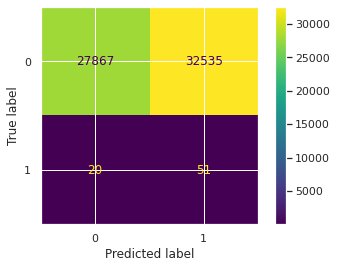

In [79]:
# Membuat fungsi klasifikasi Naive Bayes
modelnb = GaussianNB()
modelnb.fit(x_train_SMOTE, y_train_SMOTE)

# Prediksi data test
y_pred = modelnb.predict(x_test)

# Evaluasi model
evaluate_classifier_performance(modelnb, y_pred)

#### Random Forest

Hasil Evaluasi:

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     60402
           1       0.01      0.30      0.01        71

    accuracy                           0.94     60473
   macro avg       0.50      0.62      0.49     60473
weighted avg       1.00      0.94      0.97     60473


Accuracy: 0.9446364493244919
Precision: 0.006327206990057246
Recall: 0.29577464788732394
F1 Average: 0.012389380530973451


Confusion Matrix



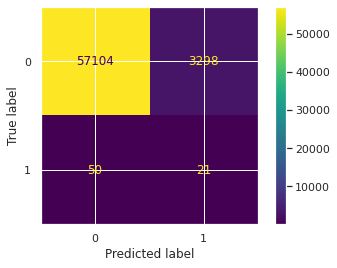

In [80]:
# Melakukan training pada model random forest
rf_md7 = RandomForestClassifier(max_depth=7)
rf_md7.fit(x_train_SMOTE, y_train_SMOTE)

# Memprediksi data testing
y_pred = rf_md7.predict(x_test)

# Evaluasi model
evaluate_classifier_performance(rf_md7, y_pred)

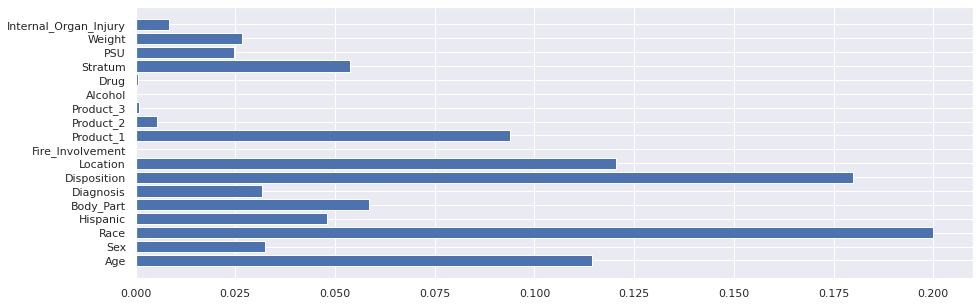

In [84]:
plt.figure(figsize=(15,5))
plt.barh(x.columns.values, rf_md7.feature_importances_)
plt.show()

#### Decision Tree

Hasil Evaluasi:

              precision    recall  f1-score   support

           0       1.00      0.80      0.89     60402
           1       0.00      0.51      0.01        71

    accuracy                           0.80     60473
   macro avg       0.50      0.66      0.45     60473
weighted avg       1.00      0.80      0.89     60473


Accuracy: 0.8034329370132125
Precision: 0.003028263795423957
Recall: 0.5070422535211268
F1 Average: 0.006020570281796136


Confusion Matrix



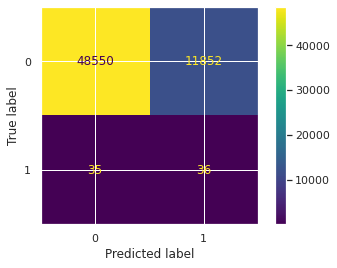

In [81]:
dt_md7 = DecisionTreeClassifier(max_depth=7)
dt_md7.fit(x_train_SMOTE, y_train_SMOTE)

y_pred = dt_md7.predict(x_test)

evaluate_classifier_performance(dt_md7, y_pred)

#### Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Hasil Evaluasi:

              precision    recall  f1-score   support

           0       1.00      0.64      0.78     60402
           1       0.00      0.63      0.00        71

    accuracy                           0.64     60473
   macro avg       0.50      0.64      0.39     60473
weighted avg       1.00      0.64      0.78     60473


Accuracy: 0.6386321168124618
Precision: 0.0020574250182882224
Recall: 0.6338028169014085
F1 Average: 0.004101535797292986


Confusion Matrix



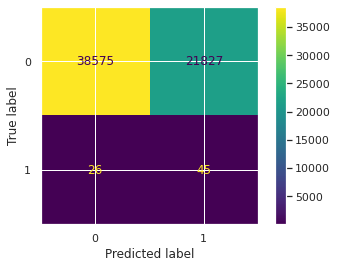

In [82]:
lr = LogisticRegression()
lr.fit(x_train_SMOTE, y_train_SMOTE)

y_pred = lr.predict(x_test)

evaluate_classifier_performance(lr, y_pred)

#### Neural Network

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

Hasil Evaluasi:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     60402
           1       0.00      0.00      0.00        71

    accuracy                           1.00     60473
   macro avg       0.50      0.50      0.50     60473
weighted avg       1.00      1.00      1.00     60473


Accuracy: 0.9988259223124369
Precision: 0.0
Recall: 0.0
F1 Average: 0.0


Confusion Matrix



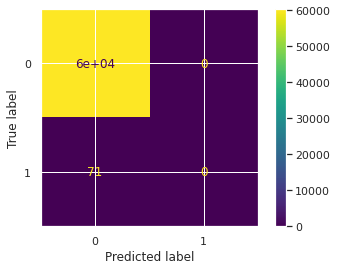

In [83]:
nn = MLPClassifier(
    solver='lbfgs',
    alpha=1e-5,
    hidden_layer_sizes=(3, 3),
    random_state=2021,
    verbose=True
)
nn.fit(x_train_SMOTE, y_train_SMOTE)

y_pred = nn.predict(x_test)

evaluate_classifier_performance(nn, y_pred)

### Hasil

Algoritma yang kami pilih dalam melakukan prediksi self inflicted adalah algoritma Random Forest dengan max depth 7.

##Buatlah model untuk memprediksi diagnosis adanya kerusakan pada organ dalam atau kerusakan pada saraf. (Hasil diagnosis berupa biner di mana 1 menandakan adanya kerusakan organ dalam atau kerusakan pada saraf, dan 0 adalah yang tidak)

In [65]:
x = dataset_standarized.drop(['Internal_Organ_Injury'], axis=1)
y = dataset_standarized.Internal_Organ_Injury

In [66]:
y.value_counts()

0    267966
1     34399
Name: Internal_Organ_Injury, dtype: int64

Perbandingan kelas 0 dan 1 tidak terlalu jauh sehingga tidak perlu dilakukan oversampling/undersampling

#### Splitting data untuk training dan testing

In [67]:
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=1)

#### Model dan Training

In [68]:
random_forest = RandomForestClassifier(max_depth=7)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=7)

#### Testing

In [69]:
y_pred = random_forest.predict(X_test)

#### Hasil

In [70]:
y_actual = pd.Series(np.array(y_test), name = "actual")
y_pred = pd.Series(np.array(y_pred), name = "prediction")
df_confusion = pd.crosstab(y_actual, y_pred)
df_confusion

prediction,0,1
actual,,
0,66992,0
1,41,8559


In [71]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='macro'))
print("F1 Score:",metrics.f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.9994576145623876
Precision: 0.999694180478272
Recall: 0.9976162790697675
F1 Score: 0.9986523351457052


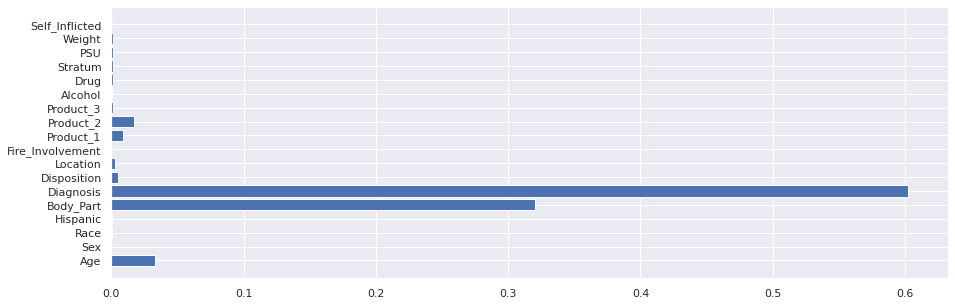

In [74]:
plt.figure(figsize=(15,5))
plt.barh(x.columns.values, random_forest.feature_importances_)
plt.show()

# Analysis

## Identifikasi siapa saja stakeholder yang dapat dikaitkan dengan analisis ini? (ex: rumah sakit, perusahaan produk tertentu, dll.)

Stakeholder yang dapat dikaitkan dengan analisis ini adalah :

*   Administrasi Rumah Sakit
*   Tim Forensik
*   Dokter
*   Instansi Pemerintahan
*   Organisasi yang bergerak di bidang Kesehatan Mental
*   Pemadam Kebakaran

## Bagaimana hasil analisis pada pertanyaan-pertanyaan di atas dapat membantu pengambilan keputusan atau proses bisnis dari stakeholder tersebut?

*  Administrasi Rumah Sakit
  - Bertanggung jawab dalam mengelola dan membuat data informasi pasien

*  Tim Forensik
  - Memeriksa keterlibatan alkohol atau obat-obatan dan dugaan utama seorang pasien

*  Dokter
  - Mengetahui langkah selanjutnya yang dapat dilakukan dengan hasil prediksi dari model

*   Organisasi yang bergerak di bidang Kesehatan Mental
  - Mengetahui langkah selanjutnya yang dapat dilakukan dengan hasil prediksi dari model

*   Pekerja Pemadam Kebakaran 
  - Menginformasikan keterlibatan api dalam suatu kasus pasien

*   Instansi Pemerintahan
  - Membantu Rumah Sakit dalam menyediakan kebutuhan terkait kasus-kasus cedera yang ada


## Apakah Anda mengalami kesulitan dalam pembuatan model? Apa yang kurang dari model yang telah Anda buat?

Kesulitan dalam pembuatan model adalah mencoba-coba memilih hyperparameter yang tepat untuk data yang kita miliki. Selain itu kami juga memiliki kesulitan dalam memilih algoritma training untuk data.

Kekurangan dari model yang telah dibuat adalah masih banyak data yang misclassified

## Berikan kesimpulan dari hasil analisis Anda secara keseluruhan



*   Berdasarkan analisis yang telah kami lakukan, didapatkan hasil bahwa orang yang terdiagnosis menyakiti diri sendiri biasa menyakiti dirinya di bagian lengan bawah
*   List item

